####**Project Name:Prediction of Home loan Appraisal**
submitted By Saptarshi Bhattacharya
---

**Problem statement:**
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan. Upon receiving the loan application, the company need to validate the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer details provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. The data (loan_prediction_train.csv) corresponds to a set of loan applications associated with individual customers. The data has 614 observations and 11 features.  Each observation is independent.  The data has missing feature values. The analyst can implement a strategy to fill the gaps if desired. There may be outliers in the data. For each observation, it was recorded whether the loan was approved or not. If the loan was approved the loan status is denoted by ‘Y’, otherwise by ‘N’.


####**Introduction**
   We are having a Train data set to generate data model. The Model will be applied to predict loan Status of the Test data set .we have to predict the Loan Appraisal.In the train data observation and targets are given.Train Data.It is a classification problem .Which  is a Binary classification.Therefore we can apply Logistic, Desicion Tree Random Forest and Support Vector Machine algorithm to build our model.In all of the models my Target variable is Loan Status .
---

##Data ingestion
___

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from statsmodels.formula.api import logit
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/loan_prediction_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#Data Description
---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


###Data summary
 Loan Id is unique customer ID.Applicant Income, Coapplicant income are contineous data type.Some of the variables such as property area, Education, Dependents are ordinal discreet type.Gender are Marital status are simply ordinal discreet types.loan status is our target variable which is also a disceet data type

#Data Preprocessing
---

### Tracking Missing Values
___


In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df1=df[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']].copy()
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df1.shape

(614, 13)

Gender, Married, Dependents,SelfEmployed,Loan Amount, Loan_amount_term,Credit History are Having missing values.Data set or sample size is not adequate that we can drop those missing values of corresponding features.Simply we can not compromise any data which may carry valueable information.So we have to deal missing values without droping it.

###Missing Value Handling
___

In [ ]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Applicant income ,CoapplicantIncome, LoanAmount, Loan_Amount_Term are measuarbale .
Credit_History shows the avaibility of the previous record in the system. It is also a one the measure how the customer is loyal to pay back if having the capacity to pay back

In [ ]:
df1['ApplicantIncome'].mode()

0    2500
Name: ApplicantIncome, dtype: int64

In [ ]:
df['CoapplicantIncome'].min(),df['CoapplicantIncome'].max(),df['CoapplicantIncome'].mean(),df['CoapplicantIncome'].median(),df['CoapplicantIncome'].mode()

(0.0,
 41667.0,
 1621.2457980271008,
 1188.5,
 0    0.0
 Name: CoapplicantIncome, dtype: float64)

It is observed the types classes are not uniform.All the missing value can not be filled by only any one of the class is not viable.Missing values will be filled propotionately.

 The method used in the code is used  to fill missing values in the Gender column is called Random Sampling Imputation. This is a common approach in data science for dealing with missing values, where the missing values are replaced with randomly selected values from the same column or feature. In this case, the missing values are being replaced with values from the 'Gender' column based on their frequency distribution. This approach can help to preserve the statistical properties of the original data and can be useful when there is no clear pattern or structure to the missing values.

In [ ]:
df1.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
df1['Gender'].value_counts(normalize=True,dropna=False)

Male      0.796417
Female    0.182410
NaN       0.021173
Name: Gender, dtype: float64

In [ ]:
df1['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [ ]:
df1['Gender'] = df1['Gender'].fillna(pd.Series(np.random.choice(['Male', 'Female'],
                                                      p=[0.81,0.19], size=len(df1))))

In [ ]:
#df1[df1['Gender'].isnull()]

Random Sampling Methods for imputation for married

In [ ]:
df1.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
df1['Married'].value_counts(normalize=True, dropna=False)

Yes    0.648208
No     0.346906
NaN    0.004886
Name: Married, dtype: float64

In [ ]:
df1['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [ ]:
df1['Married'] = df1['Married'].fillna(pd.Series(np.random.choice(['Yes', 'No'],
                                                      p=[0.65,0.35], size=len(df1))))

In [ ]:
df1[df1["Married"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
df2=df1[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']].copy()
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Random sampling imputation Method  for Self_Employed

In [ ]:
df2.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
df2['Self_Employed'].value_counts(normalize=True, dropna=False)

No     0.814332
Yes    0.133550
NaN    0.052117
Name: Self_Employed, dtype: float64

In [ ]:
df2['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [ ]:
df2['Self_Employed'] = df2['Self_Employed'].fillna(pd.Series(np.random.choice(['No','Yes'],
                                                      p=[0.86,0.14], size=len(df2))))

In [ ]:
df2[df2["Self_Employed"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
df3=df2[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']].copy()
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df3.Loan_Amount_Term .value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
df3["Loan_Amount_Term"].min(),df3["Loan_Amount_Term"].max(),df3["Loan_Amount_Term"].mean(),df3["Loan_Amount_Term"].median(),df3["Loan_Amount_Term"].mode()

(12.0,
 480.0,
 342.0,
 360.0,
 0    360.0
 Name: Loan_Amount_Term, dtype: float64)

In [ ]:
df3['Loan_Amount_Term'] = df3['Loan_Amount_Term'].fillna(360.0)

Loan amount term  mode and median are same.The value counts clearly all the values are multiple of 12 . It is discreet variable.The frequency of unique values clearly supporting to fill missing values by it's mode value

In [ ]:
df4=df3[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']].copy()
df4.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In this case credit history is a discreet data type. it is having two classes. Most of the values are one. we considered mode values for filling missing values.

In [ ]:
df4.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
df4['Credit_History'] = df4['Credit_History'].fillna(1)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df5=df4[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']].copy()
df5.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df5.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [ ]:
df5["LoanAmount"].min(),df5["LoanAmount"].max(),df5["LoanAmount"].mean(),df5["LoanAmount"].median(),df5["LoanAmount"].mode()

(9.0,
 700.0,
 146.41216216216216,
 128.0,
 0    120.0
 Name: LoanAmount, dtype: float64)

In [ ]:
df5['LoanAmount'] = df5['LoanAmount'].fillna(128.0)

In [ ]:
df5[df5["LoanAmount"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Median values is considered to missing values for Loan Amount

In [ ]:
df6=df5[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']].copy()
df6.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Random Sampling imputation method for Dependent

In [ ]:
df6.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df6['Dependents'].value_counts(normalize=True, dropna=False)

0      0.561889
1      0.166124
2      0.164495
3+     0.083062
NaN    0.024430
Name: Dependents, dtype: float64

In [ ]:
df6['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [ ]:
df6['Dependents'] = df5['Dependents'].fillna(pd.Series(np.random.choice(['0.0','1.0','2.0','3+'],
                                                      p=[0.58,0.17,0.17,0.08], size=len(df6))))

In [ ]:
df7=df6[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']].copy()
df7.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
def show_missing(df7):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""

    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    percentage_missing = []

    for item in df7.columns:
        variables.append(item)
        dtypes.append(df7[item].dtype)
        count.append(len(df7[item]))
        unique.append(len(df7[item].unique()))
        missing.append(df7[item].isna().sum())
        percentage_missing.append(round((df7[item].isna().sum() / len(df7[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing,
        'percentage_missing': percentage_missing
    })

    return output

Filled all missing values without interupting the ratio of class of each categorical data types,and count discreet type such as loan amount and loan amount term.

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
show_missing(df7)

,variable,dtype,count,unique,missing,percentage_missing
0,Loan_ID,object,614,614,0,0.0
1,Gender,object,614,2,0,0.0
2,Married,object,614,2,0,0.0
3,Dependents,object,614,7,0,0.0
4,Education,object,614,2,0,0.0
5,Self_Employed,object,614,2,0,0.0
6,ApplicantIncome,int64,614,505,0,0.0
7,CoapplicantIncome,float64,614,287,0,0.0
8,LoanAmount,float64,614,203,0,0.0
9,Loan_Amount_Term,float64,614,10,0,0.0


In [ ]:
df7["Dependents"].replace({"3+":3,"2.0":2,"1.0":1,"0.0":0},inplace=True)

In [ ]:
df7['Dependents'].value_counts()

0    345
1    102
2    101
3     51
0      9
1      3
2      3
Name: Dependents, dtype: int64

The values are discreet  the data type change for operation label Encoding is required

In [ ]:
df7["Loan_Amount_Term"]=df7["Loan_Amount_Term"].astype(int)
df7["Credit_History"]=df7["Credit_History"].astype(int)
df7["ApplicantIncome"]=df7["ApplicantIncome"].astype(int)
df7["CoapplicantIncome"]=df7["CoapplicantIncome"].astype(int)
df7["LoanAmount"]=df7["LoanAmount"].astype(int)
df7["Dependents"]=df7["Dependents"].astype(int)
#df7["Credit_History"]=df7["Credit_History"].astype(int)

###Outlier Treatment
___

Applicant Incomes are having Extreme values the .Clearly we can see below the minmum and maximum. Here Quantile method 99% considered  for Evalution

In [ ]:
df7['ApplicantIncome'].min(),df7['ApplicantIncome'].max(),df7['ApplicantIncome'].mean(),df7['ApplicantIncome'].median(),df7['ApplicantIncome'].mode()

(150,
 81000,
 5403.459283387622,
 3812.5,
 0    2500
 Name: ApplicantIncome, dtype: int64)

The code shows the  method of trimming to remove outliers from the "ApplicantIncome" column of the DataFrame "df7". Specifically, it is removing values that are greater than the 99th percentile and less than the 1st percentile of the "ApplicantIncome" column. This approach removes extreme values from the data while retaining the distributional shape of the data.

This method is also called** Winsorizing**, where the data beyond a certain percentile are capped or trimmed to the value of the percentile. In this case, values beyond the 99th percentile are capped or trimmed to the value at the 99th percentile. This is a common technique used in data analysis and can be useful in situations where extreme values are skewing the analysis.

In [ ]:
q = df7["ApplicantIncome"].quantile(0.99)
df7[df7["ApplicantIncome"] < q]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0,40,180,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [ ]:
q_low = df7["ApplicantIncome"].quantile(0.01)
q_hi  = df7["ApplicantIncome"].quantile(0.99)

loan_filtered = df7[(df7["ApplicantIncome"] < q_hi) & (df7["ApplicantIncome"] > q_low)]

In [ ]:
print("The Upper Theshold:",q_hi)
print("The lower Theshold:",q_low)

The Upper Theshold: 32540.410000000047
The lower Theshold: 1025.0


In [ ]:
df_tn=pd.DataFrame(loan_filtered)
df_tn.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [ ]:
p = df_tn["LoanAmount"].quantile(0.99)
df_tn[df_tn["LoanAmount"] < p]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0,40,180,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [ ]:
p_low = df_tn["LoanAmount"].quantile(0.01)
p_hi  = df_tn["LoanAmount"].quantile(0.99)

loan_filtered_1 = df_tn[(df_tn["LoanAmount"] < p_hi) & (df_tn["LoanAmount"] > p_low)]

In [ ]:
print("The Upper Theshold:",p_hi)
print("The lower Theshold:",p_low)

The Upper Theshold: 480.2999999999997
The lower Theshold: 30.0


After removal outlier for applicant income. Same method applied for Loan Amount

In [ ]:
df_t=pd.DataFrame(loan_filtered_1)
df_t.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [ ]:
df_tn['LoanAmount'].min(),df_tn['LoanAmount'].max()

(9, 650)

In [ ]:
df_t['LoanAmount'].min(),df_t['LoanAmount'].max()

(35, 480)

In [ ]:
df_f=df_t[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']].copy()
df_f.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


Area wise as per valuation of asset can be considered as collateral for customer loan.assumed as per locality the market value differs , therfore considerd as ordinal discreet variable.Label Encoding performed to identify the datas. Most of the data types are object data types.Tranformed the data types for evalution.

In [ ]:
df_f["Property_Area"].replace({"Urban":"3", "Semiurban":"2", "Rural":"1"},inplace=True)
df_f["Property_Area"]=df_f["Property_Area"].astype(int)
df_f["Married"].replace({"Yes":"1","No":"0"},inplace=True)
df_f["Married"] = df_f["Married"].astype(int)
df_f["Gender"].replace({"Male":"1","Female":"0"},inplace=True)
df_f["Gender"] = df_f["Gender"].astype(int)
df_f["Education"].replace({"Graduate":"1","Not Graduate":"0"},inplace=True)
df_f["Education"] = df_f["Education"].astype(int)
df_f["Self_Employed"].replace({"Yes":"1","No":"0"},inplace=True)
df_f["Self_Employed"] = df_f["Self_Employed"].astype(int)
df_f["Loan_Status"].replace({"Y":"1","N":"0"},inplace=True)
df_f["Loan_Status"] = df_f["Loan_Status"].astype(int)

In [ ]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            586 non-null    object
 1   Gender             586 non-null    int64 
 2   Married            586 non-null    int64 
 3   Dependents         586 non-null    int64 
 4   Education          586 non-null    int64 
 5   Self_Employed      586 non-null    int64 
 6   ApplicantIncome    586 non-null    int64 
 7   CoapplicantIncome  586 non-null    int64 
 8   LoanAmount         586 non-null    int64 
 9   Loan_Amount_Term   586 non-null    int64 
 10  Credit_History     586 non-null    int64 
 11  Property_Area      586 non-null    int64 
 12  Loan_Status        586 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 64.1+ KB


In [ ]:
df_F=df_f.drop(['Loan_ID'], axis=1)
df_F.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,128,360,1,3,1
1,1,1,1,1,0,4583,1508,128,360,1,1,0


In [ ]:
df_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             586 non-null    int64
 1   Married            586 non-null    int64
 2   Dependents         586 non-null    int64
 3   Education          586 non-null    int64
 4   Self_Employed      586 non-null    int64
 5   ApplicantIncome    586 non-null    int64
 6   CoapplicantIncome  586 non-null    int64
 7   LoanAmount         586 non-null    int64
 8   Loan_Amount_Term   586 non-null    int64
 9   Credit_History     586 non-null    int64
 10  Property_Area      586 non-null    int64
 11  Loan_Status        586 non-null    int64
dtypes: int64(12)
memory usage: 59.5 KB


###Imbalance Data Handling
___



Loan Status is our Target variable  which is imbalanced in this data set.we are not having adequate data for building our model so under sampling is not suitable and over sampling is little tricky.Random over sampling may change its pattern and behaviour. Random over sampling might be misleading.SMOTE is kind of oversampling which creates more data points  nearer and between  to the existing data points

In [ ]:
df_F.Loan_Status.value_counts()

1    403
0    183
Name: Loan_Status, dtype: int64

y in our Target Variable which is loan Status.All the other features are  X.It  is purpose to extract features from the target

In [ ]:
X=df_F.drop(columns=['Loan_Status'])
y=df_F['Loan_Status']

Before Sampling All features Except loan Id

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0,128,360,1,3
1,1,1,1,1,0,4583,1508,128,360,1,1
2,1,1,0,1,1,3000,0,66,360,1,3
3,1,1,0,0,0,2583,2358,120,360,1,3
4,1,0,0,1,0,6000,0,141,360,1,3
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0,71,360,1,1
610,1,1,3,1,0,4106,0,40,180,1,1
611,1,1,1,1,0,8072,240,253,360,1,3
612,1,1,2,1,0,7583,0,187,360,1,3


Before resampling Target variable

In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 586, dtype: int64

Synthetic minority oversampling Technique

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             586 non-null    int64
 1   Married            586 non-null    int64
 2   Dependents         586 non-null    int64
 3   Education          586 non-null    int64
 4   Self_Employed      586 non-null    int64
 5   ApplicantIncome    586 non-null    int64
 6   CoapplicantIncome  586 non-null    int64
 7   LoanAmount         586 non-null    int64
 8   Loan_Amount_Term   586 non-null    int64
 9   Credit_History     586 non-null    int64
 10  Property_Area      586 non-null    int64
dtypes: int64(11)
memory usage: 54.9 KB


X_res is our resampled observed variable. y_res is our target . because new data points. Due to over sampling new data point created for evaluation

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X,y)
X_res.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0,128,360,1,3
1,1,1,1,1,0,4583,1508,128,360,1,1
2,1,1,0,1,1,3000,0,66,360,1,3
3,1,1,0,0,0,2583,2358,120,360,1,3
4,1,0,0,1,0,6000,0,141,360,1,3


In [ ]:
y_res.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [ ]:
X_res.shape

(806, 11)

In [ ]:
y_res.shape

(806,)

Resampled data frame created

In [ ]:
df_res=(X_res.join(y_res))
df_res.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,128,360,1,3,1
1,1,1,1,1,0,4583,1508,128,360,1,1,0
2,1,1,0,1,1,3000,0,66,360,1,3,1
3,1,1,0,0,0,2583,2358,120,360,1,3,1
4,1,0,0,1,0,6000,0,141,360,1,3,1
5,1,1,2,1,1,5417,4196,267,360,1,3,1
6,1,1,0,0,0,2333,1516,95,360,1,3,1
7,1,1,3,1,0,3036,2504,158,360,0,2,0
8,1,1,2,1,0,4006,1526,168,360,1,3,1
9,1,1,1,1,0,12841,10968,349,360,1,2,0


After balancing  the data varified wheteher its balanced or not.

In [ ]:
df_res.Loan_Status.value_counts()

1    403
0    403
Name: Loan_Status, dtype: int64

In [ ]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             806 non-null    int64
 1   Married            806 non-null    int64
 2   Dependents         806 non-null    int64
 3   Education          806 non-null    int64
 4   Self_Employed      806 non-null    int64
 5   ApplicantIncome    806 non-null    int64
 6   CoapplicantIncome  806 non-null    int64
 7   LoanAmount         806 non-null    int64
 8   Loan_Amount_Term   806 non-null    int64
 9   Credit_History     806 non-null    int64
 10  Property_Area      806 non-null    int64
 11  Loan_Status        806 non-null    int64
dtypes: int64(12)
memory usage: 75.7 KB


###Exporting to local Disc Processed Data
___

In [ ]:
df_res.to_csv("/content/drive/MyDrive/df_Final.csv")

###Visualisation
___




In [ ]:
df_res=pd.read_csv('/content/drive/MyDrive/df_Final.csv')
df_res.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,2,0,5849,0,128,360,1,3,1
1,1,1,1,2,0,4583,1508,128,360,1,1,0
2,1,1,0,2,1,3000,0,66,360,1,3,1
3,1,1,0,1,0,2583,2358,120,360,1,3,1
4,1,0,0,2,0,6000,0,141,360,1,3,1


**Outlier Visualisation using BoxPlot Applicant Income**

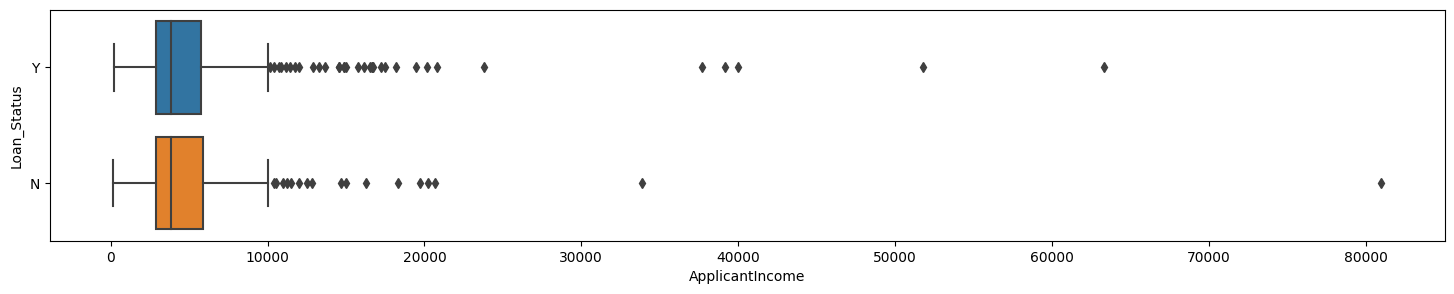

In [ ]:
#showing boxplot using seaborn
plt.figure(figsize = (18,3)) #fixing size of the output (optional)
sns.boxplot(x='ApplicantIncome', y='Loan_Status', data=df)
plt.show()

Applicant Income After removing outliers for category Applicant Income

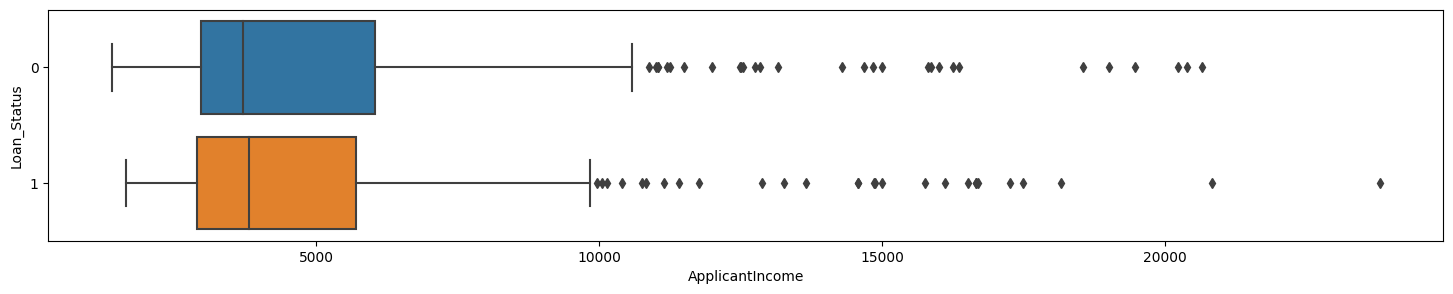

In [ ]:
#showing boxplot using seaborn
plt.figure(figsize = (18,3)) #fixing size of the output (optional)
sns.boxplot(x='ApplicantIncome', y='Loan_Status', data=df_res,orient='h')
plt.show()

**Outlier Visualisation using Box Plot Lonamount are having few outlires**

Loan Amount Before removing Outliers

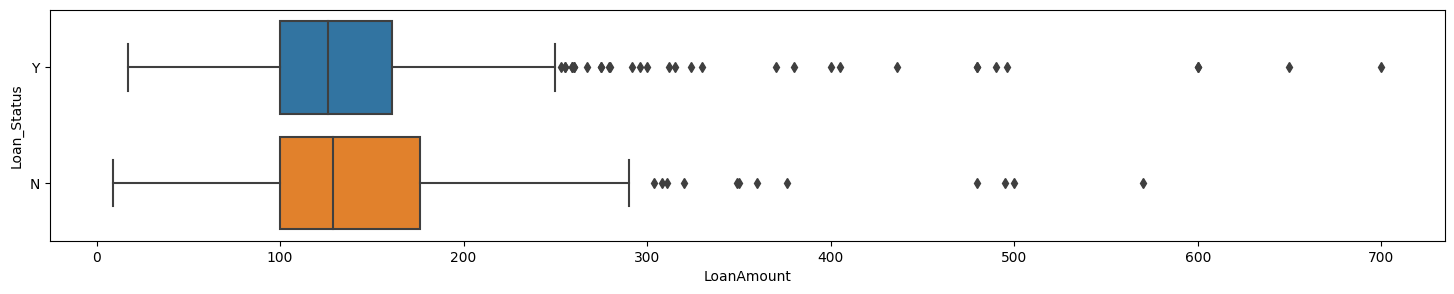

In [ ]:
#showing boxplot using seaborn
plt.figure(figsize = (18,3)) #fixing size of the output (optional)
sns.boxplot(x='LoanAmount', y='Loan_Status', data=df)
plt.show()

Loan Amount After removing outliers for category Loan Amount

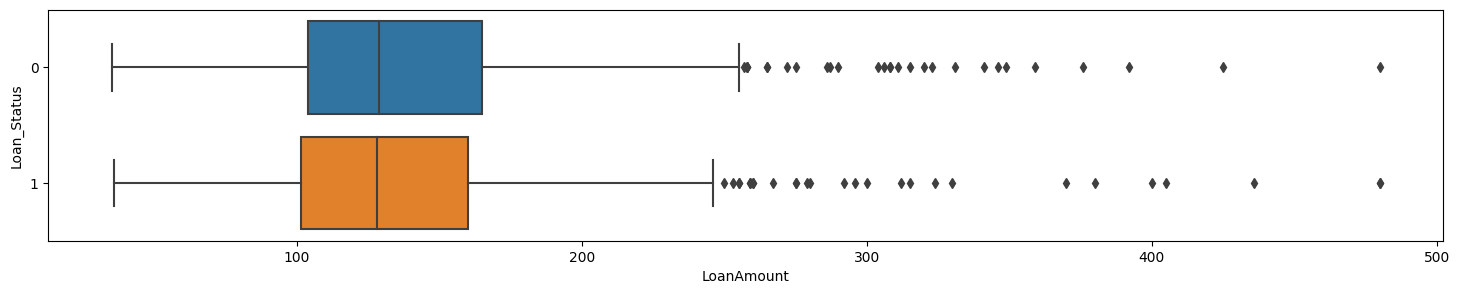

In [ ]:
#showing boxplot using seaborn
plt.figure(figsize = (18,3)) #fixing size of the output (optional)
sns.boxplot(x='LoanAmount', y='Loan_Status', data=df_res,orient='h')
plt.show()

### Correlation Matrix
___


Multi colinearity matrix shows the mutual correlation between features. The higher values in this matrix are having much lighter in shades.Darker cells are having lower values.Some of the features are having the inverse correlation,therfore the values are negative.if the correlation are higher it's means both are carrying same kind of information in our model.Any of then can be replaced by looking at the correlation with the target individually. Dependent and Married are quite similar. But Ideally They are different.

<Figure size 32000x10000 with 0 Axes>

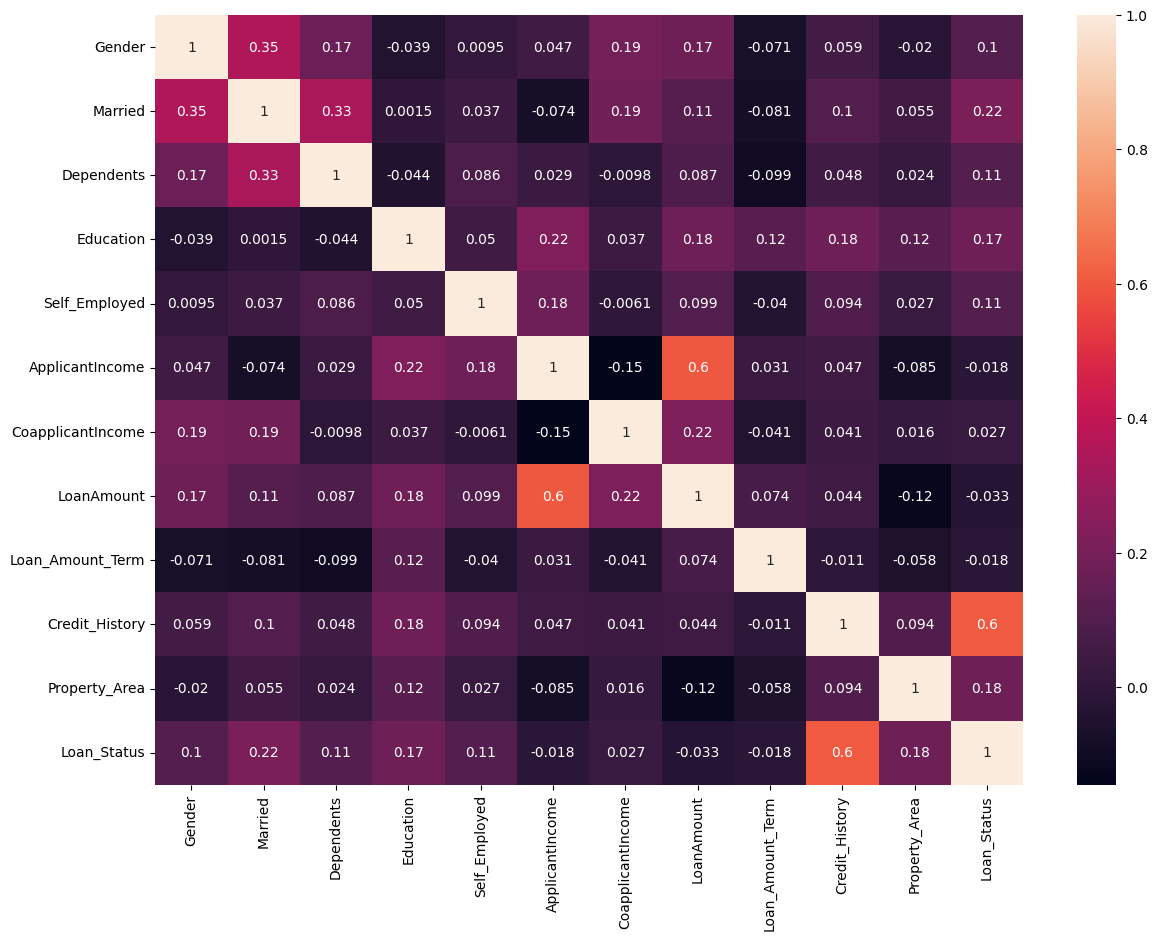

<Figure size 32000x10000 with 0 Axes>

In [ ]:
#correlation
plt.figure(figsize = (14,10))
sns.heatmap(df_res.corr(),annot=True)
#plt.figure(figsize = (320,100))
plt.figure(figsize = (320,100))

The matrix shows  Loan Amount is and ApplicantIncome are having same kind of information .The amount of loan for borrower depends on borrowers income.

####Main Dataframe Transfomered to Dummy Variable
---

In [ ]:
df_res=pd.read_csv('/content/drive/MyDrive/df_Final.csv')
df_res.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,2,0,5849,0,128,360,1,3,1
1,1,1,1,2,0,4583,1508,128,360,1,1,0
2,1,1,0,2,1,3000,0,66,360,1,3,1
3,1,1,0,1,0,2583,2358,120,360,1,3,1
4,1,0,0,2,0,6000,0,141,360,1,3,1


x is all the features  and y is our target column

In [ ]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             806 non-null    int64
 1   Married            806 non-null    int64
 2   Dependents         806 non-null    int64
 3   Education          806 non-null    int64
 4   Self_Employed      806 non-null    int64
 5   ApplicantIncome    806 non-null    int64
 6   CoapplicantIncome  806 non-null    int64
 7   LoanAmount         806 non-null    int64
 8   Loan_Amount_Term   806 non-null    int64
 9   Credit_History     806 non-null    int64
 10  Property_Area      806 non-null    int64
 11  Loan_Status        806 non-null    int64
dtypes: int64(12)
memory usage: 75.7 KB


In [ ]:
df_mm=df_res
df_mm.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,2,0,5849,0,128,360,1,3,1
1,1,1,1,2,0,4583,1508,128,360,1,1,0
2,1,1,0,2,1,3000,0,66,360,1,3,1


Created a Dataframe of Base model dummy variable

In [ ]:
# change the categorical variables into dummy
df_d=pd.get_dummies(df_mm,columns=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'],drop_first=True)
df_d.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_1,Married_1,Dependents_1,Dependents_2,Dependents_3,Education_2,Self_Employed_1,Credit_History_1,Property_Area_2,Property_Area_3
0,5849,0,128,360,1,1,0,0,0,0,1,0,1,0,1
1,4583,1508,128,360,0,1,1,1,0,0,1,0,1,0,0
2,3000,0,66,360,1,1,1,0,0,0,1,1,1,0,1
3,2583,2358,120,360,1,1,1,0,0,0,0,0,1,0,1
4,6000,0,141,360,1,1,0,0,0,0,1,0,1,0,1


In [ ]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ApplicantIncome    806 non-null    int64
 1   CoapplicantIncome  806 non-null    int64
 2   LoanAmount         806 non-null    int64
 3   Loan_Amount_Term   806 non-null    int64
 4   Loan_Status        806 non-null    int64
 5   Gender_1           806 non-null    uint8
 6   Married_1          806 non-null    uint8
 7   Dependents_1       806 non-null    uint8
 8   Dependents_2       806 non-null    uint8
 9   Dependents_3       806 non-null    uint8
 10  Education_2        806 non-null    uint8
 11  Self_Employed_1    806 non-null    uint8
 12  Credit_History_1   806 non-null    uint8
 13  Property_Area_2    806 non-null    uint8
 14  Property_Area_3    806 non-null    uint8
dtypes: int64(5), uint8(10)
memory usage: 39.5 KB


### Base model
___

In The Base model to see model performance

In [ ]:
#lets extract features and targets
X0=df_d.drop(columns=['Loan_Status'])
y0=df_d['Loan_Status']

Features extracted from the target, X is all the features in the frame y is our target Variable, which is loan Status

In [ ]:
X0

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_1,Married_1,Dependents_1,Dependents_2,Dependents_3,Education_2,Self_Employed_1,Credit_History_1,Property_Area_2,Property_Area_3
0,5849,0,128,360,1,0,0,0,0,1,0,1,0,1
1,4583,1508,128,360,1,1,1,0,0,1,0,1,0,0
2,3000,0,66,360,1,1,0,0,0,1,1,1,0,1
3,2583,2358,120,360,1,1,0,0,0,0,0,1,0,1
4,6000,0,141,360,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,7264,1374,111,360,1,0,0,0,0,0,0,0,1,0
802,2378,0,46,360,0,0,0,0,0,1,0,1,0,0
803,2157,0,89,360,0,0,0,0,0,1,0,0,1,0
804,16009,0,287,360,1,0,0,0,0,1,0,0,0,0


In [ ]:
y0

0      1
1      0
2      1
3      1
4      1
      ..
801    0
802    0
803    0
804    0
805    0
Name: Loan_Status, Length: 806, dtype: int64

####Base Model Logistic
___

80% of Data used for training purpose.Rest 20% of percent datas are being used for test our model.Featues and Targets variable separated for both train and test set,train_X is observed features for training data,train_y  is Loan_Staus. which is  our target variable.test_x is our observed features, test_y is our target variable in test data set


In [ ]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X0,test_X0,train_y0,test_y0=train_test_split(X0,y0,test_size=0.2,random_state=0)

train_X0.shape,test_X0.shape,train_y0.shape,test_y0.shape

((644, 14), (162, 14), (644,), (162,))

In [ ]:
train_set0=pd.DataFrame(train_X0)#,train_y)
train_set0['Loan']=train_y0
test_set0=pd.DataFrame(test_X0)
train_set0.shape,test_set0.shape

((644, 15), (162, 14))

In [ ]:
model_base_log=logit('Loan ~  ApplicantIncome + CoapplicantIncome + LoanAmount+ Loan_Amount_Term + Gender_1+Married_1+Dependents_1+	Dependents_2+	Dependents_3+	Education_2+Self_Employed_1+Credit_History_1+	Property_Area_2+Property_Area_3',data=train_set0).fit()
print(model_base_log.summary())
probs_base_log=model_base_log.predict(test_set0)
y_pred_base_log=np.where(probs_base_log>0.5,1,0)  # Default prob cut-off=0.5
y_pred_base_log

Optimization terminated successfully.
         Current function value: 0.435819
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   Loan   No. Observations:                  644
Model:                          Logit   Df Residuals:                      629
Method:                           MLE   Df Model:                           14
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                  0.3711
Time:                        06:49:31   Log-Likelihood:                -280.67
converged:                       True   LL-Null:                       -446.27
Covariance Type:            nonrobust   LLR p-value:                 3.554e-62
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.1083      0.857     -4.792      0.000      -5.789      -2.428
Applican

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
cm_base_log = confusion_matrix(test_y0,y_pred_base_log)
print('Accuracy score: ', format(accuracy_score(test_y0,y_pred_base_log)))
print('Precision score: ', format(precision_score(test_y0,y_pred_base_log,average = None)))
print('Recall score: ', format(recall_score(test_y0,y_pred_base_log,average = None)))
print(cm_base_log)

Accuracy score:  0.7839506172839507
Precision score:  [0.8125     0.76530612]
Recall score:  [0.69333333 0.86206897]
[[52 23]
 [12 75]]


confusion matrix says 52 predictions are predicted yes and actually yes, 75 prediction are predicted negative and actually negatives.Where as 23 times predicted yes but actually found no.There are 12 times predicted no But actually found yes.

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_base_log, tpr_base_log, thresholds_log = roc_curve(test_y0, probs_base_log)
roc_auc_base_log = auc(fpr_base_log, tpr_base_log)
roc_auc_base_log

0.8803065134099617

The auc means  area under the curve the area defines the ability of the model to classify any two classes from each other. the more the area it is a comparisor of specificity over sensitivity,

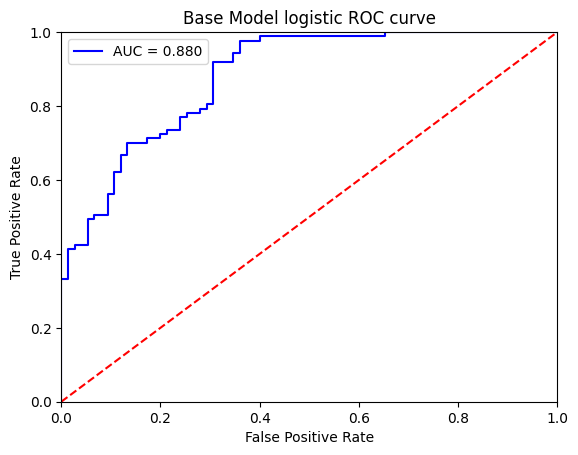

In [ ]:
# Plot ROC curve
plt.title('Base Model logistic ROC curve')
plt.plot(fpr_base_log, tpr_base_log, 'b', label = 'AUC = %0.3f' % roc_auc_base_log)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Base Model Descision Tree

separate target and observed variable

In [ ]:
train_set0=train_set0.drop(['Loan'],axis=1)
train_set0

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_1,Married_1,Dependents_1,Dependents_2,Dependents_3,Education_2,Self_Employed_1,Credit_History_1,Property_Area_2,Property_Area_3
48,4000,2275,144,360,0,0,0,0,0,1,0,1,1,0
364,3333,2500,128,360,1,1,0,0,0,1,0,1,1,0
434,2483,2466,90,180,1,1,0,0,0,1,0,0,0,0
316,4384,1793,117,360,1,0,1,0,0,1,0,1,0,1
802,2378,0,46,360,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,6080,0,215,341,1,1,0,0,0,0,0,0,0,0
192,3917,0,124,360,1,1,0,1,0,0,0,1,1,0
629,2954,1664,74,225,1,1,0,1,0,0,0,0,0,1
559,4283,3000,172,84,1,1,1,0,0,1,0,1,0,0


In [ ]:
clf_bdt = DecisionTreeClassifier(max_depth=9,random_state=0)
clf_bdt.fit(train_set0,train_y0)

y_pred_test_bdt=clf_bdt.predict(test_set0)
y_pred_train_bdt=clf_bdt.predict(train_set0)
#find accuracy
ac_te_bdt=accuracy_score(test_y0,y_pred_test_bdt)
ac_tr_bdt=accuracy_score(train_y0,y_pred_train_bdt)
print(ac_te_bdt,ac_tr_bdt)

0.7839506172839507 0.9347826086956522


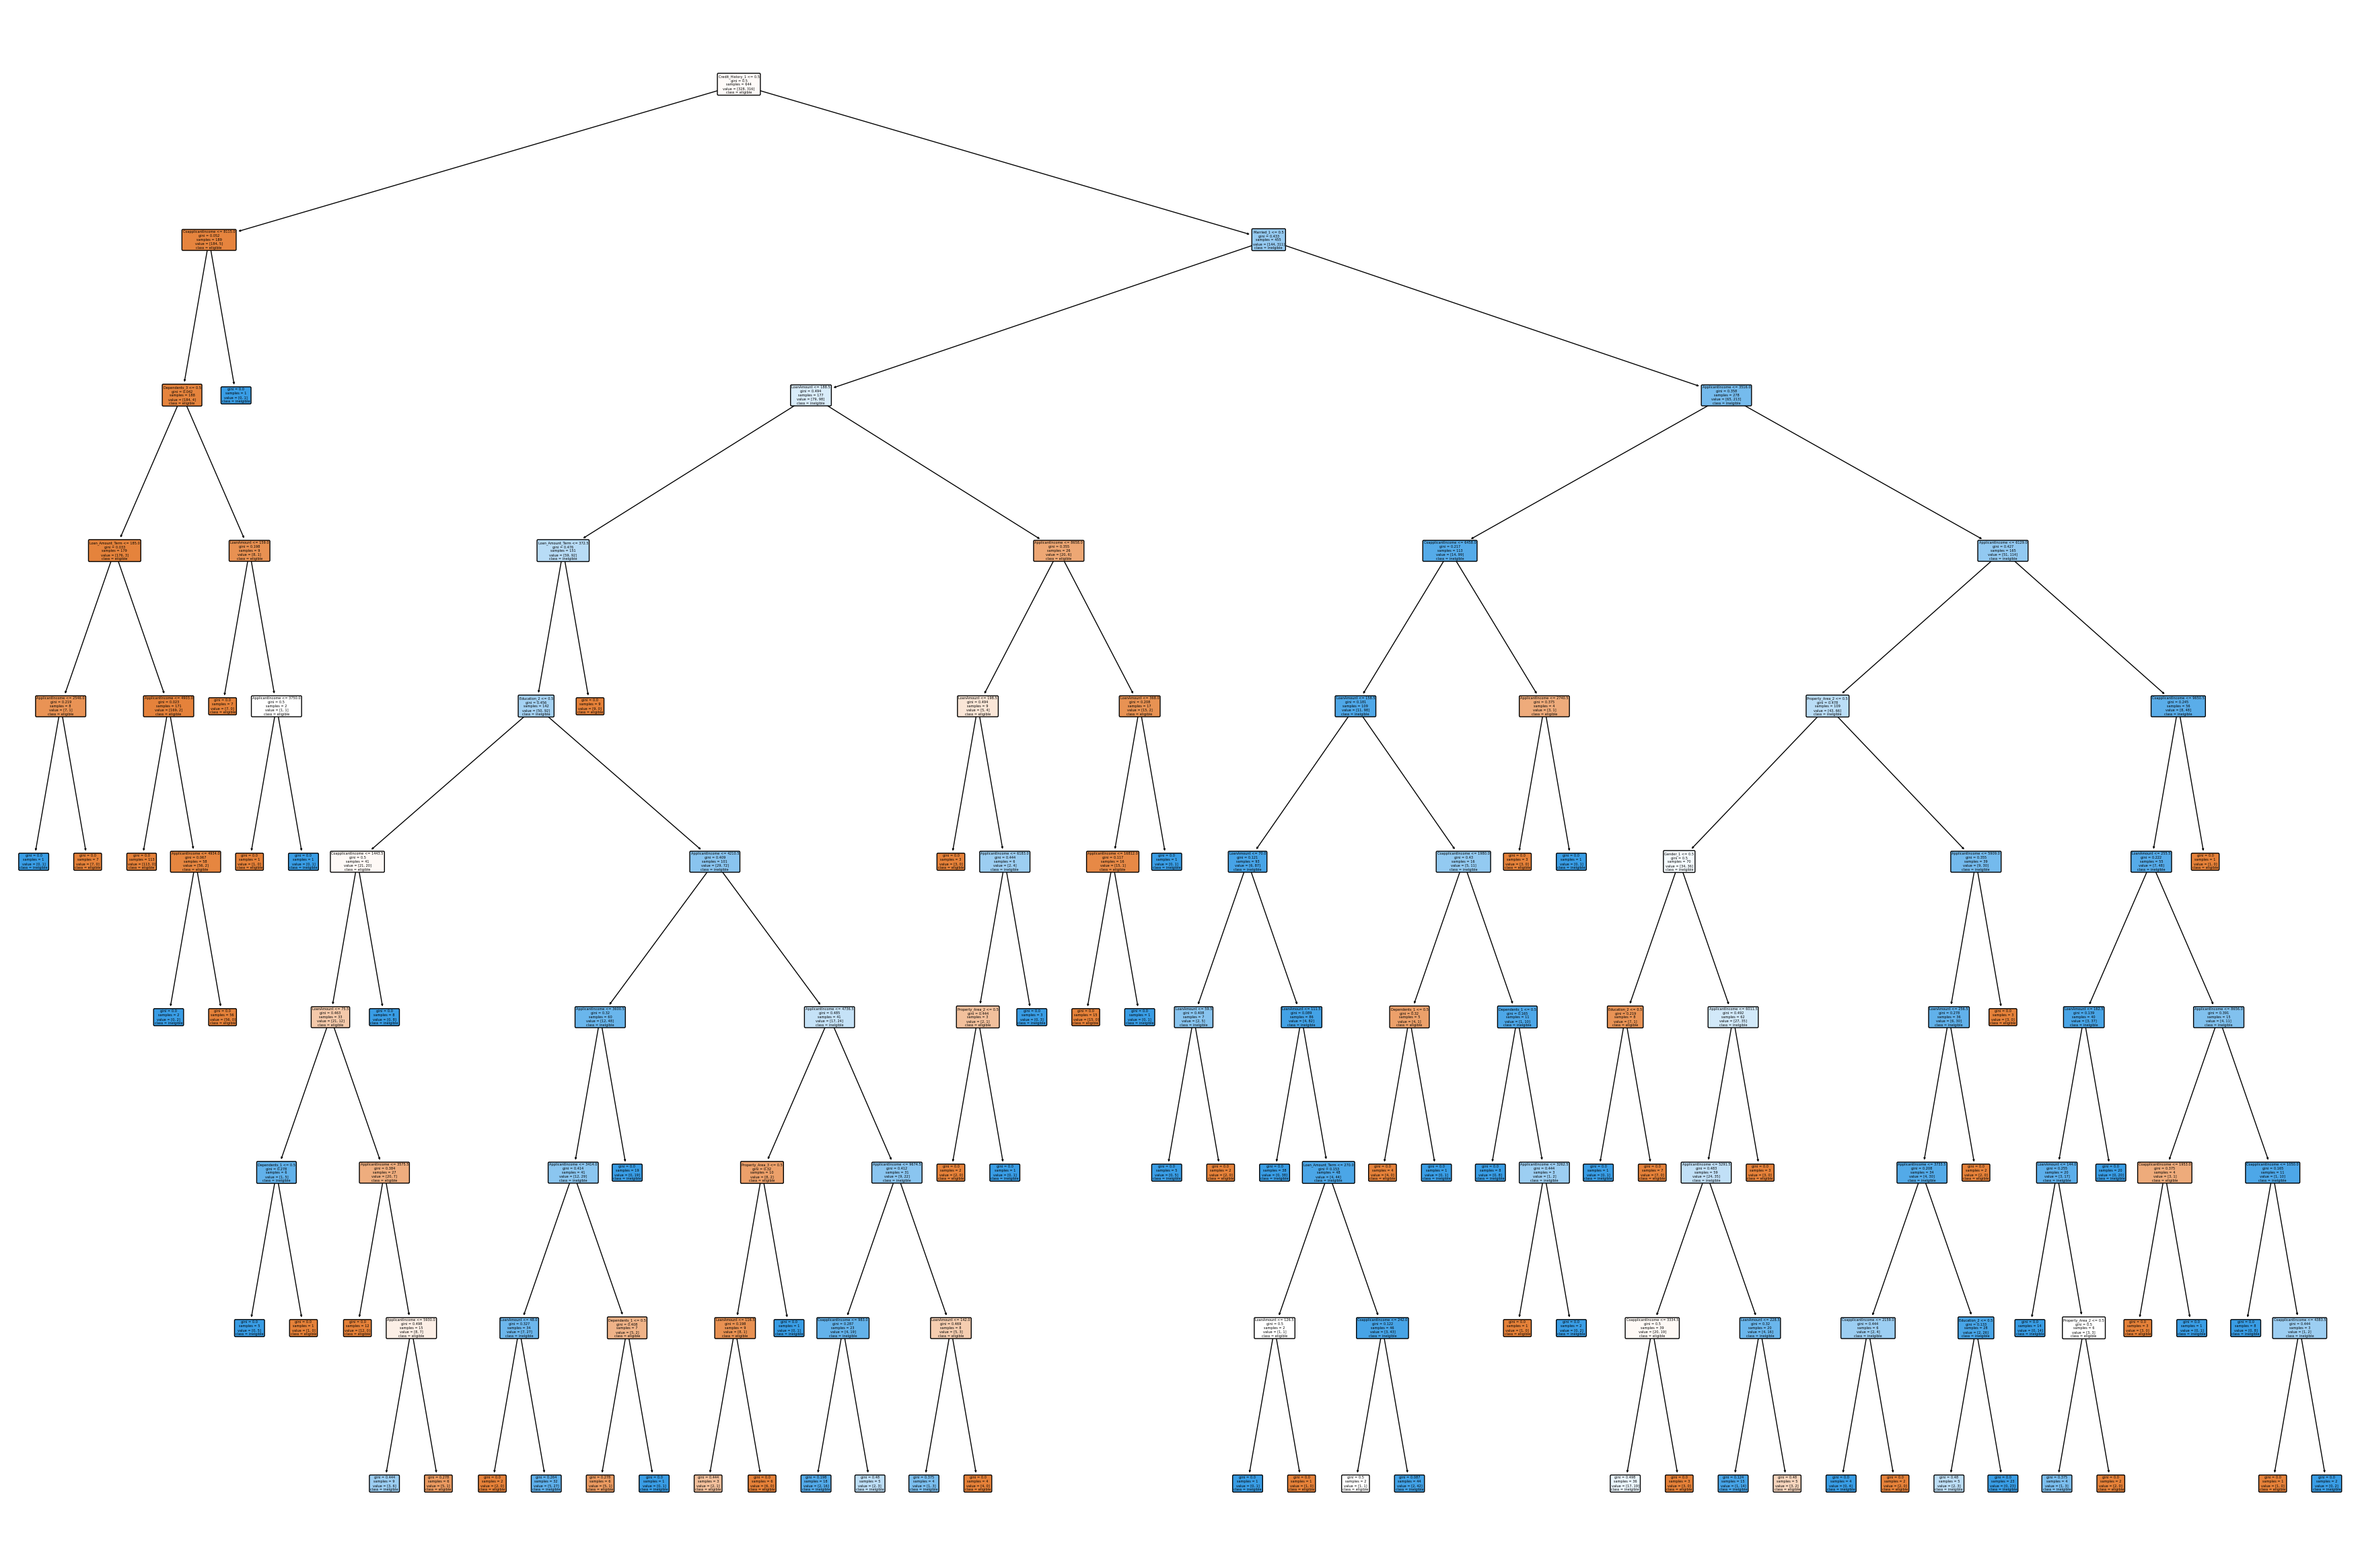

In [ ]:
plt.figure(figsize=(45,30))
plot_tree(clf_bdt,
          filled = True,
          rounded = True,
          class_names=["eligible","inelgible"],
          feature_names=train_set0.columns
          )
plt.show()

roc_auc _base_dt is receiver  operating characteristics curve for  Decision Tree Base model

In [ ]:
test_b_prob=clf_bdt.predict_proba(test_set0)
fpr_base_dt, tpr_base_dt, thresholds_dt = roc_curve(test_y0, test_b_prob[:,1])
roc_auc_base_dt = auc(fpr_base_dt, tpr_base_dt)
roc_auc_base_dt

0.7959386973180076

In [ ]:
cm_base_dt= confusion_matrix(test_y0,y_pred_test_bdt)
cm_base_dt

array([[58, 17],
       [18, 69]])

confusion matrix says 58 predictions are predicted yes and actually yes, 69 prediction are predicted negative and actually negatives.Where as 17 times predicted yes but actually found no.There are 18 times predicted no But are actually found yes.

ROC for Base Decision Tree

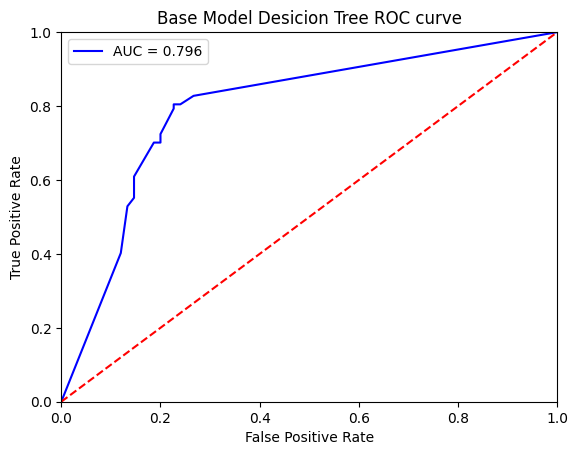

In [ ]:
# Plot ROC curve
plt.title('Base Model Desicion Tree ROC curve')
plt.plot(fpr_base_dt, tpr_base_dt, 'b', label = 'AUC = %0.3f' % roc_auc_base_dt)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Base Model Random Forest

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf_brf=RandomForestClassifier(n_estimators=20,max_depth=11,random_state=0)
clf_brf.fit(train_set0,train_y0)

y_pred_test_brf=clf_brf.predict(test_set0)
y_pred_train_brf=clf_brf.predict(train_set0)

In [ ]:
#find accuracy
ac_te_brf=accuracy_score(test_y0,y_pred_test_brf)
ac_tr_brf=accuracy_score(train_y0,y_pred_train_brf)
print(ac_te_brf,ac_tr_brf)

0.8641975308641975 0.9798136645962733


roc_auc_base_rf is the area under the curve  for random forest base model

In [ ]:
test_prob_rf=clf_brf.predict_proba(test_set0)
fpr_base_rf, tpr_base_rf, thresholds_rf = roc_curve(test_y0, test_prob_rf[:,1])
roc_auc_base_rf = auc(fpr_base_rf, tpr_base_rf)
roc_auc_base_rf

0.8941762452107279

Random Forest  Base Model  confusion matrix

In [ ]:
cm_base_rf= confusion_matrix(test_y0,y_pred_test_brf)
cm_base_rf

array([[59, 16],
       [ 6, 81]])

confusion matrix says 59 predictions are predicted yes and actually yes, 81 prediction are predicted negative and actually negatives.Where as 16 times predicted yes but actually found no.There are 6 intances where predicted no But actually yes

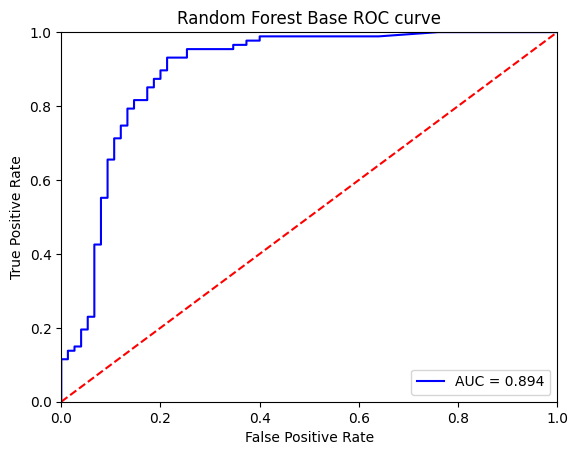

In [ ]:
# Plot ROC curve
plt.title('Random Forest Base ROC curve')
plt.plot(fpr_base_rf, tpr_base_rf, 'b', label = 'AUC = %0.3f' % roc_auc_base_rf)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####Base Model Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
X0_train,X0_test,y0_train,y0_test = train_test_split(X0,y0, test_size=0.2, random_state=0, stratify=y0)

In [ ]:
sc = StandardScaler()
sc.fit(X0_train)
X0_train_std = sc.transform(X0_train)
X0_test_std = sc.transform(X0_test)

In [ ]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='rbf',probability= True)

# Fit the model
svc.fit(X0_train_std, y0_train)

SVC(probability=True, random_state=1)

In [ ]:
# Make the predictions
predict_svmb_y0 = svc.predict(X0_test_std)
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y0_test,predict_svmb_y0))
print("Recall score %.3f" %metrics.recall_score(y0_test, predict_svmb_y0))
print("Precision score %.3f" %metrics.precision_score(y0_test, predict_svmb_y0))
print("f1 score %.3f"%metrics.f1_score(y0_test,predict_svmb_y0))

Accuracy score 0.821
Recall score 0.914
Precision score 0.771
f1 score 0.836


In [ ]:
cm_base_svm= confusion_matrix(y0_test,predict_svmb_y0)
cm_base_svm

array([[59, 22],
       [ 7, 74]])

The confusion matrix shows that 59 predictions are predicted as yes and actually yes, 74 predictions are predicted as negative and actually negatives. However, there were 22 instances where it was predicted as yes but actually no, and 7 instances where it was predicted as no but actually yes.

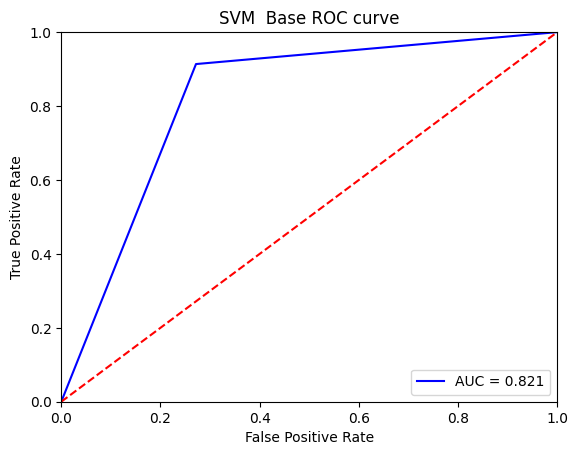

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute fpr, tpr, and thresholds
fpr_base_svc, tpr_base_svc, thresholds = roc_curve(y0_test, predict_svmb_y0)
roc_auc_base_svc = auc(fpr_base_svc, tpr_base_svc)

# Plot ROC curve
plt.title('SVM  Base ROC curve')
plt.plot(fpr_base_svc, tpr_base_svc, 'b', label='AUC = %0.3f' % roc_auc_base_svc)
plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


####Base model XGBoost

In [ ]:
import xgboost as xgb

# Split data into training and testing sets
X0train, X0test, y0train, y0test = train_test_split(df_d.drop('Loan_Status', axis=1), df_d['Loan_Status'], test_size=0.2, random_state=42)

# Define XGBoost model and train
clf_bxgb = xgb.XGBClassifier()
clf_bxgb.fit(X0train,y0train)

# Predict on testing set

y0_pred_test_bxgb=clf_bxgb.predict(X0test)
y0_pred_train_bxgb=clf_bxgb.predict(X0train)

#find accuracy
ac_te_bxgb=accuracy_score(y0test,y0_pred_test_bxgb)

print(ac_te_bxgb)

0.8580246913580247


In [ ]:
cm_base_xgb= confusion_matrix(y0test,y0_pred_test_bxgb)
cm_base_xgb

array([[68, 13],
       [10, 71]])

confusion matrix says 68 predictions are predicted yes and actually found  yes and 71 prediction are predicted negative and actually found negatives.Where as 13 times predicted yes but actually found no.There are 10 instances were  predicted  no But actually found yes.

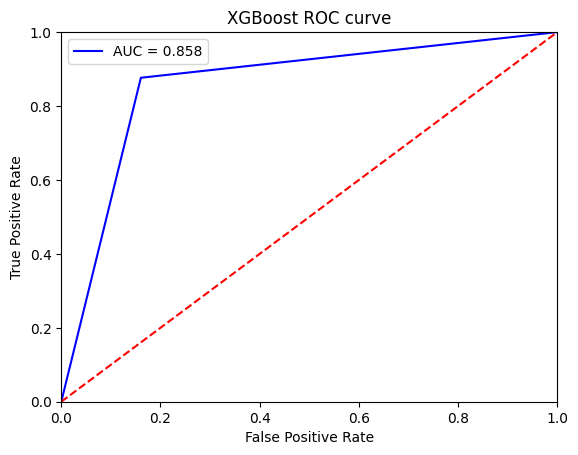

In [ ]:
# Compute fpr, tpr, and thresholds
fpr_bxgb, tpr_bxgb, thresholds = roc_curve(y0test, y0_pred_test_bxgb)
roc_auc_bxgb = auc(fpr_bxgb, tpr_bxgb)

# Plot ROC curve
plt.title('XGBoost ROC curve')
plt.plot(fpr_bxgb, tpr_bxgb, 'b', label='AUC = %0.3f' % roc_auc_bxgb)
plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Feature selection using Extra Tree

In [ ]:
#lets extract features and targets
X0=df_d.drop(columns=['Loan_Status'],axis=1)
y0=df_d['Loan_Status']

[0.16406376 0.10244256 0.15362614 0.04654984 0.02381784 0.04198052
 0.0199346  0.01507527 0.01125454 0.02860261 0.01975699 0.32099956
 0.02814524 0.02375053]


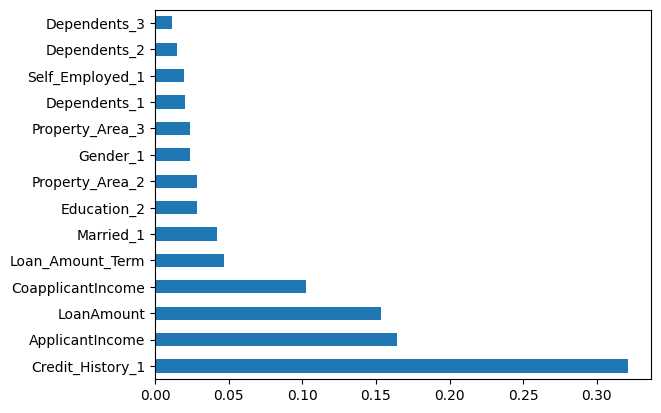

In [ ]:
from sklearn.base import ClassifierMixin
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
m_Etc=ExtraTreesClassifier()
m_Etc.fit(X0,y0)
print(m_Etc.feature_importances_)
feat_importances=pd.Series(m_Etc.feature_importances_,index=X0.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

According to Extra Tree classifier the Credit History isthe most important feature in the model . Applicantincome,Coapplicant income is also important which ensures the potiential of customer to payback. Then loan amount is also has importance.
The bar graphs shows the selection priority of features is a model

In [ ]:
# New Dataframe after feature selection
feature=df_d[['Married_1','Education_2','CoapplicantIncome','ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History_1','Property_Area_2','Property_Area_3','Loan_Status']].copy()
feature.head()

,Married_1,Education_2,CoapplicantIncome,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_1,Property_Area_2,Property_Area_3,Loan_Status
0,0,1,0,5849,128,360,1,0,1,1
1,1,1,1508,4583,128,360,1,0,0,0
2,1,1,0,3000,66,360,1,0,1,1
3,1,0,2358,2583,120,360,1,0,1,1
4,0,1,0,6000,141,360,1,0,1,1


In [ ]:
#lets extract features and targets
X1=feature.drop(columns=['Loan_Status'],axis=1)
y1=feature['Loan_Status']

In [ ]:
X1

,Married_1,Education_2,CoapplicantIncome,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_1,Property_Area_2,Property_Area_3
0,0,1,0,5849,128,360,1,0,1
1,1,1,1508,4583,128,360,1,0,0
2,1,1,0,3000,66,360,1,0,1
3,1,0,2358,2583,120,360,1,0,1
4,0,1,0,6000,141,360,1,0,1
...,...,...,...,...,...,...,...,...,...
801,0,0,1374,7264,111,360,0,1,0
802,0,1,0,2378,46,360,1,0,0
803,0,1,0,2157,89,360,0,1,0
804,0,1,0,16009,287,360,0,0,0


train_X1 is features of train set. train_y1 is target of train set.test_X1 and test_y1 is the features and target of the test set respectively.

In [ ]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X1,test_X1,train_y1,test_y1=train_test_split(X1,y1,test_size=0.2,random_state=0)

train_X1.shape,test_X1.shape,train_y1.shape,test_y1.shape

((644, 9), (162, 9), (644,), (162,))

In [ ]:
train_y1

48     1
364    1
434    1
316    1
802    0
      ..
763    0
192    1
629    0
559    0
684    0
Name: Loan_Status, Length: 644, dtype: int64

In [ ]:
train_set1=pd.DataFrame(train_X1)#,train_y)
train_set1['Loan_Status']=train_y1
test_set1=pd.DataFrame(test_X1)
train_set1.shape,test_set1.shape

((644, 10), (162, 9))

###Logistic Regression using Extra Tree

In [ ]:
model_feature_log=logit('Loan_Status ~  ApplicantIncome + CoapplicantIncome + LoanAmount + Loan_Amount_Term + Married_1+ Education_2 +Credit_History_1+Property_Area_2+Property_Area_3',data=train_set1).fit()
print(model_feature_log.summary2())
probs_feature_log=model_feature_log.predict(test_set1)
y_pred_feature_log=np.where(probs_feature_log>0.5,1,0)  # Default prob cut-off=0.5
y_pred_feature_log

Optimization terminated successfully.
         Current function value: 0.438652
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.367     
Dependent Variable: Loan_Status      AIC:              584.9837  
Date:               2023-04-20 06:52 BIC:              629.6607  
No. Observations:   644              Log-Likelihood:   -282.49   
Df Model:           9                LL-Null:          -446.27   
Df Residuals:       634              LLR p-value:      3.6603e-65
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -4.0372   0.8297 -4.8660 0.0000 -5.6633 -2.4110
ApplicantIncome    0.0000   0.0000  0.4940 0.6213 -0.0001  0.0001


array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
cm_feature_log = confusion_matrix(test_y1,y_pred_feature_log)
print('Feature selective Accuracy score: ', format(accuracy_score(test_y1,y_pred_feature_log)))
print('Feature selected Precision score: ', format(precision_score(test_y1,y_pred_feature_log,average = None)))
print('Feature selected Recall score: ', format(recall_score(test_y1,y_pred_feature_log,average = None)))
print(cm_feature_log)

Feature selective Accuracy score:  0.7901234567901234
Feature selected Precision score:  [0.82539683 0.76767677]
Feature selected Recall score:  [0.69333333 0.87356322]
[[52 23]
 [11 76]]


confusion matrix says 52 predictions are predicted yes and actually yes and  76 prediction are predicted negative and actually negatives.Where as 23 times predicted yes but actually those are found  no.There area 11 events, where  predicted no But actually  found yes.

Inspite of dropping features there is no significant change between accuracy of base logistic and Feature selected logistic by Extra trees

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_Ex_log, tpr_Ex_log, thresholds_log = roc_curve(test_y1,probs_feature_log)
roc_auc_Ex_log = auc(fpr_Ex_log, tpr_Ex_log)
roc_auc_Ex_log

0.8723371647509579

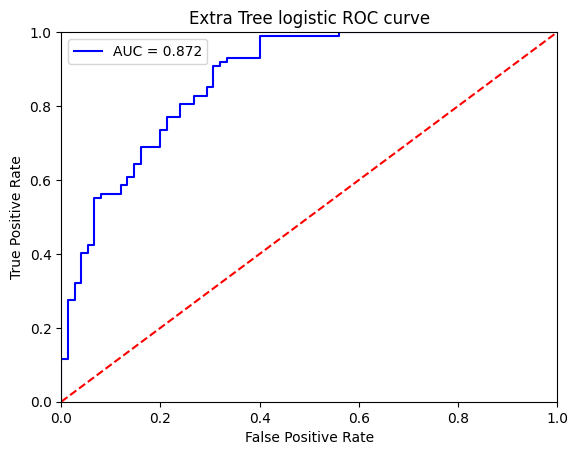

In [ ]:
# Plot ROC curve
plt.title('Extra Tree logistic ROC curve')
plt.plot(fpr_Ex_log, tpr_Ex_log, 'b', label = 'AUC = %0.3f' % roc_auc_Ex_log)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Decision Trees using Extra tree

In [ ]:
train_set1=train_set1.drop(['Loan_Status'],axis=1)
train_set1

,Married_1,Education_2,CoapplicantIncome,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_1,Property_Area_2,Property_Area_3
48,0,1,2275,4000,144,360,1,1,0
364,1,1,2500,3333,128,360,1,1,0
434,1,1,2466,2483,90,180,0,0,0
316,0,1,1793,4384,117,360,1,0,1
802,0,1,0,2378,46,360,1,0,0
...,...,...,...,...,...,...,...,...,...
763,1,0,0,6080,215,341,0,0,0
192,1,0,0,3917,124,360,1,1,0
629,1,0,1664,2954,74,225,0,0,1
559,1,1,3000,4283,172,84,1,0,0


In [ ]:
clf_fdt = DecisionTreeClassifier(max_depth=9,random_state=0)
clf_fdt.fit(train_set1,train_y1)

y_pred_test_fdt=clf_fdt.predict(test_set1)
y_pred_train_fdt=clf_fdt.predict(train_set1)
#find accuracy
ac_te_fdt=accuracy_score(test_y1,y_pred_test_fdt)
ac_tr_fdt=accuracy_score(train_y1,y_pred_train_fdt)
print(ac_te_fdt,ac_tr_fdt)

0.7654320987654321 0.9503105590062112


In [ ]:
cm_feature_dt= confusion_matrix(test_y1,y_pred_test_fdt)
cm_feature_dt

array([[58, 17],
       [21, 66]])

confusion matrix says 58 predictions are predicted yes and actually yes, 66 prediction are predicted negative and actually negatives.Where as 17 times predicted yes but actually found no.There are 21 case predicted as no But actually found  yes.

In [ ]:
test_f_prob=clf_fdt.predict_proba(test_set1)
fpr_Ex_dt, tpr_Ex_dt, thresholds_dt = roc_curve(test_y1, test_f_prob[:,1])
roc_auc_Ex_dt = auc(fpr_Ex_dt, tpr_Ex_dt)
roc_auc_Ex_dt

0.7842911877394636

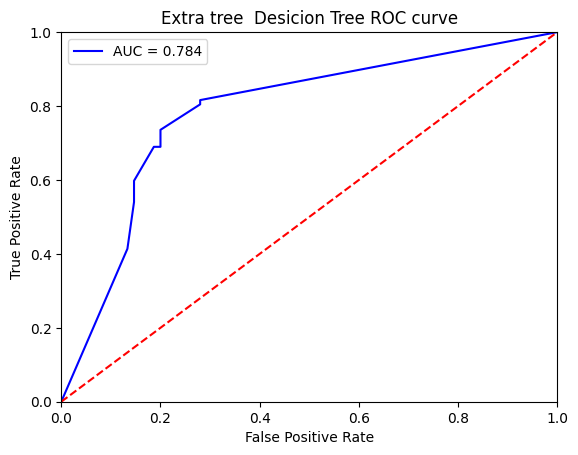

In [ ]:
# Plot ROC curve
plt.title('Extra tree  Desicion Tree ROC curve')
plt.plot(fpr_Ex_dt, tpr_Ex_dt, 'b', label = 'AUC = %0.3f' % roc_auc_Ex_dt)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Random Forest using Extra tree

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf_frf=RandomForestClassifier(n_estimators=20,max_depth=11,random_state=0)
clf_frf.fit(train_set1,train_y1)

y_pred_test_frf=clf_frf.predict(test_set1)
y_pred_train_frf=clf_frf.predict(train_set1)

In [ ]:
test_set1

,Married_1,Education_2,CoapplicantIncome,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_1,Property_Area_2,Property_Area_3
8,1,1,1526,4006,168,360,1,0,1
258,0,1,1857,2833,126,360,1,0,0
172,0,1,5063,1916,67,360,1,0,0
317,0,1,0,2935,98,360,1,1,0
294,0,1,0,20233,480,360,1,0,0
...,...,...,...,...,...,...,...,...,...
255,0,1,0,3418,135,360,1,0,0
162,1,1,0,8000,200,360,1,1,0
116,0,1,0,10408,259,360,1,0,1
37,0,1,7210,4166,184,360,1,0,1


In [ ]:
#find accuracy
ac_te_frf=accuracy_score(test_y1,y_pred_test_frf)
ac_tr_frf=accuracy_score(train_y1,y_pred_train_frf)
print(ac_te_frf,ac_tr_frf)

0.8395061728395061 0.984472049689441


In [ ]:
cm_feature_rf= confusion_matrix(test_y1,y_pred_test_frf)
cm_feature_rf

array([[60, 15],
       [11, 76]])

confusion matrix says 60 predictions are predicted yes and actually found  yes and 76 prediction are predicted negative and actually  found negatives.Where as 15 times predicted yes but actually found no.There are 11 instances were  predicted  no But actually found yes.

In [ ]:
test_prob_frf=clf_frf.predict_proba(test_set1)
fpr_frf, tpr_frf, thresholds_frf = roc_curve(test_y1, test_prob_frf[:,1])
roc_auc_frf = auc(fpr_frf, tpr_frf)
roc_auc_frf

0.9042145593869731

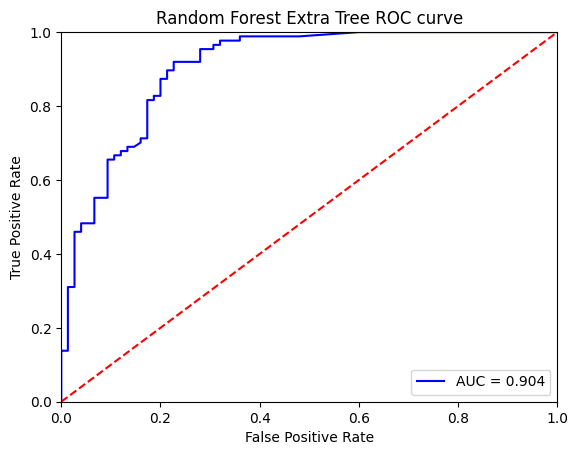

In [ ]:
# Plot ROC curve
plt.title('Random Forest Extra Tree ROC curve')
plt.plot(fpr_frf, tpr_frf, 'b', label = 'AUC = %0.3f' % roc_auc_frf)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###Support Vector Machine using Extra tree

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=1, stratify=y1)

In [ ]:
sc1 = StandardScaler()
sc1.fit(X1_train)
X1_train_std = sc1.transform(X1_train)
X1_test_std = sc1.transform(X1_test)

In [ ]:
# Instantiate the Support Vector Classifier (SVC)
svc1 = SVC(C=1.0, random_state=1, kernel=('rbf'))

# Fit the model
svc1.fit(X1_train_std,y1_train)

SVC(random_state=1)

In [ ]:
# Make the predictions
predict_svmf_y1 = svc1.predict(X1_test_std)
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y1_test, predict_svmf_y1))
print("Recall score %.3f" %metrics.recall_score(y1_test,predict_svmf_y1))
print("Precision score %.3f" %metrics.precision_score(y1_test, predict_svmf_y1))
print("f1 score %.3f"%metrics.f1_score(y1_test,predict_svmf_y1))

Accuracy score 0.802
Recall score 0.914
Precision score 0.747
f1 score 0.822


In [ ]:
cm_Extra_svm= confusion_matrix(y1_test,predict_svmf_y1)
cm_Extra_svm

array([[56, 25],
       [ 7, 74]])

confusion matrix says 56 predictions are predicted yes and actually yes.whese as 74 prediction are predicted negative and actually found negatives.onthe otherhand 25 times predicted yes but actually found  no.There are 7 instances were  predicted no But actually found yes.

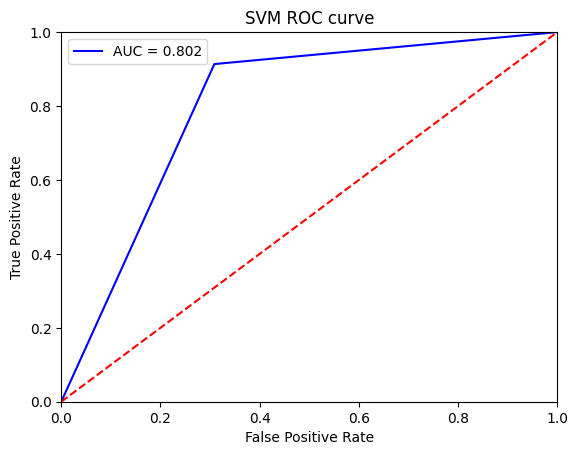

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute fpr, tpr, and thresholds
fpr_E_svc, tpr_E_svc, thresholds = roc_curve(y1_test, predict_svmf_y1)
roc_auc_E_svc = auc(fpr_E_svc, tpr_E_svc)

# Plot ROC curve
plt.title('SVM ROC curve')
plt.plot(fpr_E_svc, tpr_E_svc, 'b', label='AUC = %0.3f' % roc_auc_E_svc)
plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Xg boost using Extra Tree

In [ ]:
import xgboost as xgb

# Split data into training and testing sets
X1train, X1test, y1train, y1test = train_test_split(feature.drop('Loan_Status', axis=1), feature['Loan_Status'], test_size=0.2, random_state=42)

# Define XGBoost model and train
clf_fxgb = xgb.XGBClassifier()
clf_fxgb.fit(X1train,y1train)

# Predict on testing set

y1_pred_test_fxgb=clf_fxgb.predict(X1test)
y1_pred_train_fxgb=clf_fxgb.predict(X1train)

#find accuracy
ac_te_fxgb=accuracy_score(y1test,y1_pred_test_fxgb)
ac_tr_fxgb=accuracy_score(y1train,y1_pred_train_fxgb)
print(ac_te_fxgb,ac_tr_fxgb)

0.845679012345679 1.0


In [ ]:
cm_feature_xgb= confusion_matrix(y1test,y1_pred_test_fxgb)
cm_feature_xgb

array([[65, 16],
       [ 9, 72]])

confusion matrix says 65 predictions are predicted yes and actually found  yes and 72 prediction are predicted negative and actually found negatives.Where as 16 times predicted yes but actually found no.There are 9 instances were  predicted  no But actually found yes.

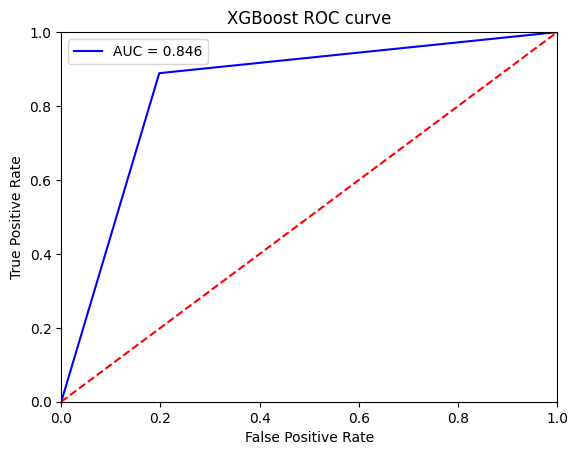

In [ ]:
# Compute fpr, tpr, and thresholds
fpr_fxgb, tpr_fxgb, thresholds = roc_curve(y1test, y1_pred_test_fxgb)
roc_auc_fxgb = auc(fpr_fxgb, tpr_fxgb)

# Plot ROC curve
plt.title('XGBoost ROC curve')
plt.plot(fpr_fxgb, tpr_fxgb, 'b', label='AUC = %0.3f' % roc_auc_fxgb)
plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####Alternative method of selecting Feature importance

### Feature Selection Using vif Method
___

variance inflation Factor method identify the better features for the Model

In [ ]:
df_res=pd.read_csv("/content/drive/MyDrive/df_Final.csv")
df_res.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             806 non-null    int64
 1   Married            806 non-null    int64
 2   Dependents         806 non-null    int64
 3   Education          806 non-null    int64
 4   Self_Employed      806 non-null    int64
 5   ApplicantIncome    806 non-null    int64
 6   CoapplicantIncome  806 non-null    int64
 7   LoanAmount         806 non-null    int64
 8   Loan_Amount_Term   806 non-null    int64
 9   Credit_History     806 non-null    int64
 10  Property_Area      806 non-null    int64
 11  Loan_Status        806 non-null    int64
dtypes: int64(12)
memory usage: 75.7 KB


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


W =df_res[[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = W.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(W.values, i)
                          for i in range(len(W.columns))]

print(vif_data)

              feature        VIF
0              Gender   5.076381
1             Married   3.067588
2          Dependents   1.711194
3           Education  16.161045
4       Self_Employed   1.176432
5     ApplicantIncome   6.090030
6   CoapplicantIncome   1.784435
7          LoanAmount  11.164933
8    Loan_Amount_Term  16.406044
9      Credit_History   3.640103
10      Property_Area   6.532329


Education having larger value.Therefore dropped Education and check so on and so forth

In [ ]:
df_model0=W.drop(columns=['Education'])

vif0= pd.DataFrame()
vif0["feature"] = df_model0.columns

# calculating VIF for each feature
vif0["VIF"] = [variance_inflation_factor(df_model0.values, i)
                          for i in range(len(df_model0.columns))]
print(vif0)

             feature        VIF
0             Gender   5.076088
1            Married   3.062780
2         Dependents   1.710301
3      Self_Employed   1.176432
4    ApplicantIncome   5.905794
5  CoapplicantIncome   1.777372
6         LoanAmount  11.100800
7   Loan_Amount_Term  11.367648
8     Credit_History   3.489605
9      Property_Area   6.073412


loan Amount term and Education are also having higher vif value.Therefore both  variables removed

In [ ]:
df_model1=W.drop(columns=['Loan_Amount_Term','Education'])

vif1= pd.DataFrame()
vif1["feature"] = df_model1.columns

# calculating VIF for each feature
vif1["VIF"] = [variance_inflation_factor(df_model1.values, i)
                          for i in range(len(df_model1.columns))]

print(vif1)

             feature       VIF
0             Gender  4.782574
1            Married  3.062317
2         Dependents  1.709100
3      Self_Employed  1.174093
4    ApplicantIncome  5.899725
5  CoapplicantIncome  1.771871
6         LoanAmount  9.754996
7     Credit_History  3.307865
8      Property_Area  4.319252


similarly the featutes which are having higher values to be removed.In this case Education,Loan_Amount_Term,Gender,LoanAmount,Property_Area

In [ ]:
df_model2=W.drop(columns=['Education','Loan_Amount_Term','Gender','LoanAmount','Property_Area'])
# VIF dataframe
vif2 = pd.DataFrame()
vif2["feature"] = df_model2.columns

# calculating VIF for each feature
vif2["VIF"] = [variance_inflation_factor(df_model2.values, i)
                          for i in range(len(df_model2.columns))]

print(vif2)

             feature       VIF
0            Married  2.497350
1         Dependents  1.679115
2      Self_Employed  1.169815
3    ApplicantIncome  2.247807
4  CoapplicantIncome  1.422660
5     Credit_History  2.623663


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

m = str(input("Enter data frame name: "))
df_dict = {
    'A' : df_res[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']],
    'B' : df_res[['Gender','Married','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Property_Area']],
    'C' : df_res[['Gender','Married','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','Credit_History','Property_Area']],
    'D' : df_res[['Gender','Married','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','Property_Area']],
    'E' : df_res[['Married','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','Property_Area']],
}

def get_vif(df_input):
  df_new = pd.DataFrame()
  df_new["feature"] = df_input.columns
  # calculating VIF for each feature
  df_new["VIF"] = [variance_inflation_factor(df_input.values, i)
                          for i in range(len(df_input.columns))]
  return df_new

vif = get_vif(df_dict.get(m))
print(vif)

Enter data frame name: B
             feature       VIF
0             Gender  4.782574
1            Married  3.062317
2         Dependents  1.709100
3      Self_Employed  1.174093
4    ApplicantIncome  5.899725
5  CoapplicantIncome  1.771871
6         LoanAmount  9.754996
7     Credit_History  3.307865
8      Property_Area  4.319252


###Feature Selected Data Frame
___

Drpooed some features only important features considered

In [ ]:
df_model2.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History
0,0,0,0,5849,0,1
1,1,1,0,4583,1508,1
2,1,0,1,3000,0,1
3,1,0,0,2583,2358,1
4,0,0,0,6000,0,1


Created Festure Selectec Column with Dummy variables

In [ ]:
ds=df_model2.join(y_res)
ds.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Loan_Status
0,0,0,0,5849,0,1,1
1,1,1,0,4583,1508,1,0
2,1,0,1,3000,0,1,1
3,1,0,0,2583,2358,1,1
4,0,0,0,6000,0,1,1


In [ ]:
# change the categorical variables into dummy
dd=pd.get_dummies(ds,columns=['Married','Dependents','Self_Employed','Credit_History'],drop_first=True)
dd.head()

,ApplicantIncome,CoapplicantIncome,Loan_Status,Married_1,Dependents_1,Dependents_2,Dependents_3,Self_Employed_1,Credit_History_1
0,5849,0,1,0,0,0,0,0,1
1,4583,1508,0,1,1,0,0,0,1
2,3000,0,1,1,0,0,0,1,1
3,2583,2358,1,1,0,0,0,0,1
4,6000,0,1,0,0,0,0,0,1


In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ApplicantIncome    806 non-null    int64
 1   CoapplicantIncome  806 non-null    int64
 2   Loan_Status        806 non-null    int64
 3   Married_1          806 non-null    uint8
 4   Dependents_1       806 non-null    uint8
 5   Dependents_2       806 non-null    uint8
 6   Dependents_3       806 non-null    uint8
 7   Self_Employed_1    806 non-null    uint8
 8   Credit_History_1   806 non-null    uint8
dtypes: int64(3), uint8(6)
memory usage: 23.7 KB


####Features  Selected Logistics
____

ds is the feature selected dataframe which was tranformed into a dummy variable data frame as dd

X2 is features of Data Frame selected by vif . y2 is Target variable

In [ ]:
#lets extract features and targets
X2=dd.drop(columns=['Loan_Status'])
y2=dd['Loan_Status']

In [ ]:
X2

,ApplicantIncome,CoapplicantIncome,Married_1,Dependents_1,Dependents_2,Dependents_3,Self_Employed_1,Credit_History_1
0,5849,0,0,0,0,0,0,1
1,4583,1508,1,1,0,0,0,1
2,3000,0,1,0,0,0,1,1
3,2583,2358,1,0,0,0,0,1
4,6000,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
801,7264,1374,0,0,0,0,0,0
802,2378,0,0,0,0,0,0,1
803,2157,0,0,0,0,0,0,0
804,16009,0,0,0,0,0,0,0


In [ ]:
y2

0      1
1      0
2      1
3      1
4      1
      ..
801    0
802    0
803    0
804    0
805    0
Name: Loan_Status, Length: 806, dtype: int64

train_X2 is features of train set. train_y2 is target of train set.test_X2 and test_y2 is the features and target of the test set respectively.

In [ ]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X2,test_X2,train_y2,test_y2=train_test_split(X2,y2,test_size=0.2,random_state=0)

train_X2.shape,test_X2.shape,train_y2.shape,test_y2.shape

((644, 8), (162, 8), (644,), (162,))

In [ ]:
train_set2=pd.DataFrame(train_X2)#,train_y)
train_set2['Loan']=train_y2
test_set2=pd.DataFrame(test_X2)
train_set2.shape,test_set2.shape

((644, 9), (162, 8))

In [ ]:
train_set2.head()

,ApplicantIncome,CoapplicantIncome,Married_1,Dependents_1,Dependents_2,Dependents_3,Self_Employed_1,Credit_History_1,Loan
48,4000,2275,0,0,0,0,0,1,1
364,3333,2500,1,0,0,0,0,1,1
434,2483,2466,1,0,0,0,0,0,1
316,4384,1793,0,1,0,0,0,1,1
802,2378,0,0,0,0,0,0,1,0


In [ ]:
model_log=logit('Loan ~ ApplicantIncome	+CoapplicantIncome+Married_1+Dependents_1+Dependents_2+Dependents_3+Self_Employed_1+Credit_History_1',data=train_set2).fit()
print(model_log.summary2())
probs_vif_log=model_log.predict(test_set2)
y_pred_log=np.where(probs_vif_log>0.5,1,0)  # Default prob cut-off=0.5
y_pred_log

Optimization terminated successfully.
         Current function value: 0.457203
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.340     
Dependent Variable: Loan             AIC:              606.8777  
Date:               2023-04-20 06:58 BIC:              647.0870  
No. Observations:   644              Log-Likelihood:   -294.44   
Df Model:           8                LL-Null:          -446.27   
Df Residuals:       635              LLR p-value:      6.8075e-61
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -3.8959   0.4973 -7.8345 0.0000 -4.8706 -2.9213
ApplicantIncome   -0.0000   0.0000 -1.5898 0.1119 -0.0001  0.0000


array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
cm_log1 = confusion_matrix(test_y2,y_pred_log)
print('Accuracy score: ', format(accuracy_score(test_y2,y_pred_log)))
print('Precision score: ', format(precision_score(test_y2,y_pred_log,average = None)))
print('Recall score: ', format(recall_score(test_y2,y_pred_log,average = None)))
print(cm_log1)

Accuracy score:  0.8271604938271605
Precision score:  [0.97959184 0.76106195]
Recall score:  [0.64       0.98850575]
[[48 27]
 [ 1 86]]


confusion matrix says 48 predictions are predicted yes and actually yes, and 86 prediction are predicted negative and actually found negatives.Where as 27 times predicted yes but actually found no.There is only 1 case were  predicted no But actually became yes.

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_log, tpr_log, thresholds_log = roc_curve(test_y2, probs_vif_log)
roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_log

0.8685057471264368

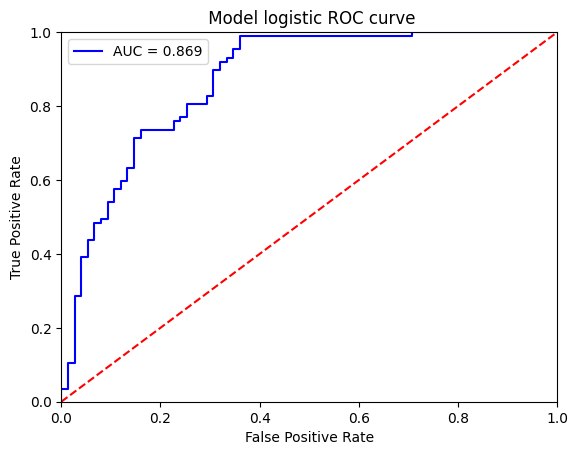

In [ ]:
# Plot ROC curve
plt.title(' Model logistic ROC curve')
plt.plot(fpr_log, tpr_log, 'b', label = 'AUC = %0.3f' % roc_auc_log)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####Feature selected Desicion Trees
___

In [ ]:
train_set2=train_set2.drop(['Loan'],axis=1)
train_set2

,ApplicantIncome,CoapplicantIncome,Married_1,Dependents_1,Dependents_2,Dependents_3,Self_Employed_1,Credit_History_1
48,4000,2275,0,0,0,0,0,1
364,3333,2500,1,0,0,0,0,1
434,2483,2466,1,0,0,0,0,0
316,4384,1793,0,1,0,0,0,1
802,2378,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
763,6080,0,1,0,0,0,0,0
192,3917,0,1,0,1,0,0,1
629,2954,1664,1,0,1,0,0,0
559,4283,3000,1,1,0,0,0,1


In [ ]:
clf_vdt = DecisionTreeClassifier(max_depth=9,random_state=0)
clf_vdt.fit(train_set2,train_y2)

y_pred_test_vdt=clf_vdt.predict(test_set2)
y_pred_train_vdt=clf_vdt.predict(train_set2)
#find accuracy
ac_te_vdt=accuracy_score(test_y2,y_pred_test_vdt)
ac_tr_vdt=accuracy_score(train_y2,y_pred_train_vdt)
print(ac_te_vdt,ac_tr_vdt)

0.7901234567901234 0.9472049689440993


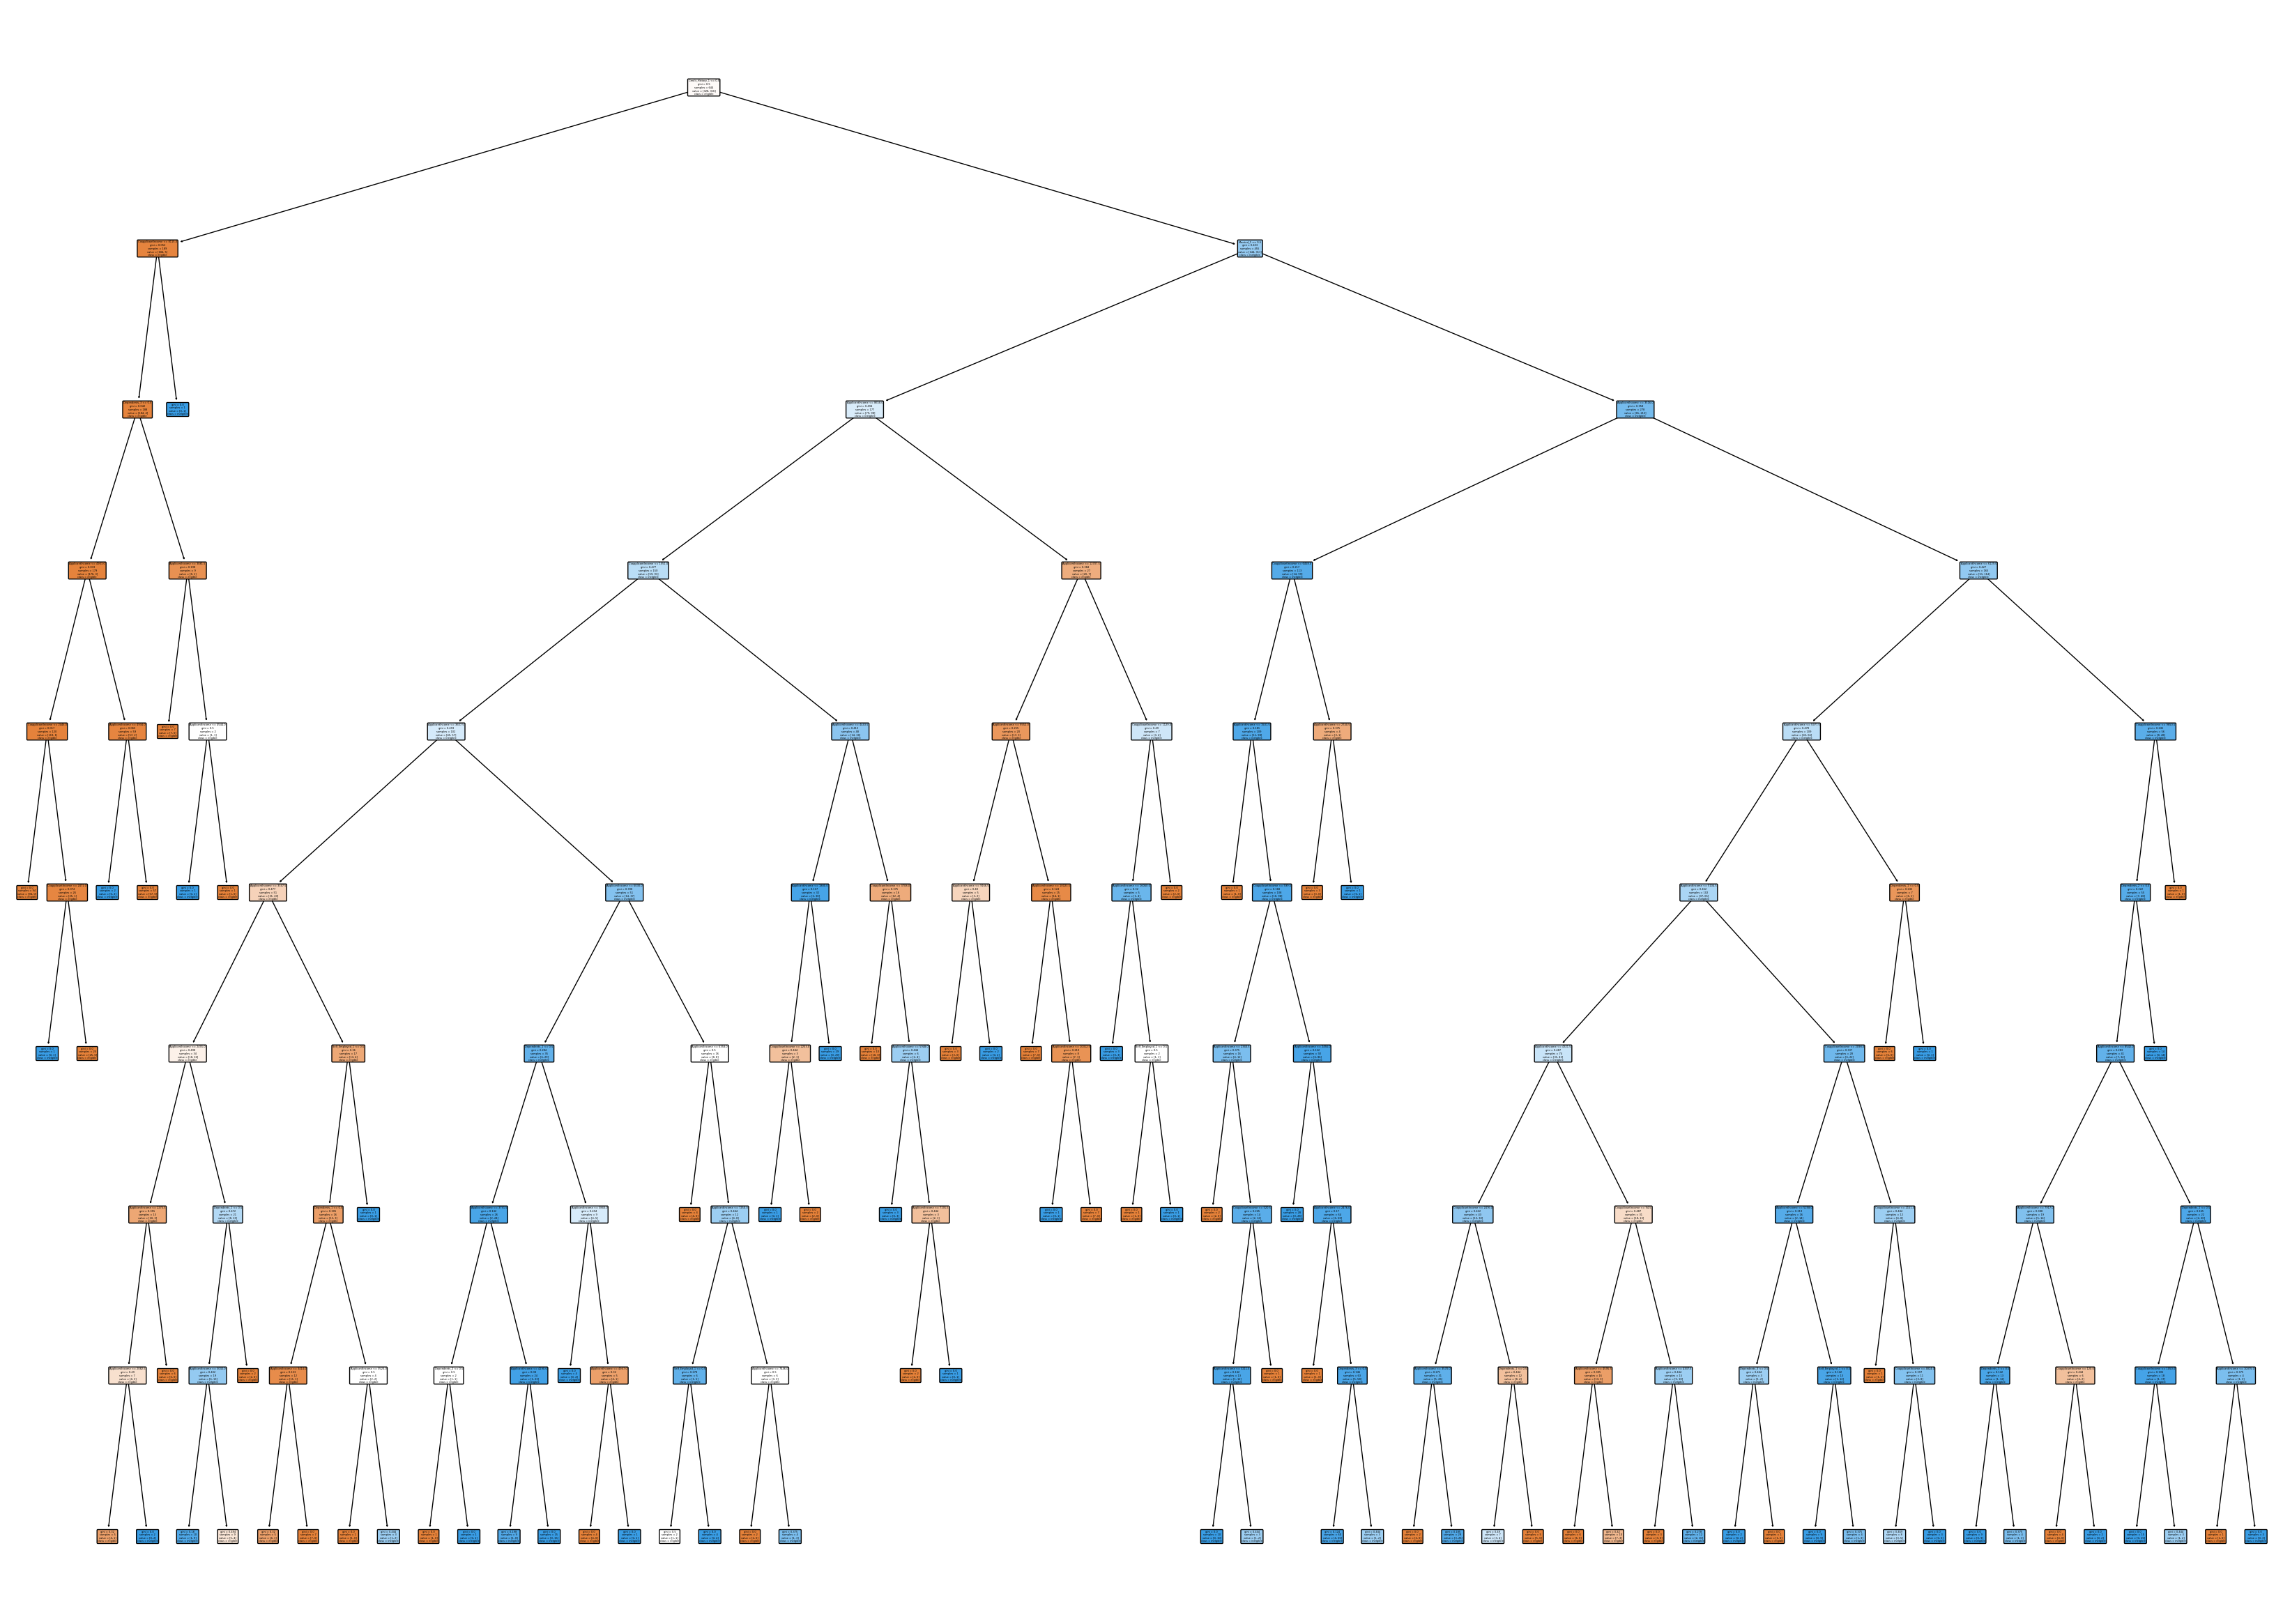

In [ ]:
plt.figure(figsize=(42,30))
plot_tree(clf_vdt,
          filled = True,
          rounded = True,
          class_names=["eligible","inelgible"],
          feature_names=train_set2.columns
          )
plt.show()

In [ ]:
test_prob=clf_vdt.predict_proba(test_set2)
fpr_vdt, tpr_vdt, thresholds_vdt = roc_curve(test_y2, test_prob[:,1])
roc_auc_vdt = auc(fpr_vdt, tpr_vdt)
roc_auc_vdt

0.8232950191570882

Decision Treee confusion matrix for feature selected model

In [ ]:
cm_vdt = confusion_matrix(test_y2,y_pred_test_vdt)
cm_vdt

array([[61, 14],
       [20, 67]])

confusion matrix says 61 predictions are predicted yes and actually yes and there are  67 prediction was predicted negative and actually  negatives.Where as 14 times predicted yes but actually found no, There are 20 instances were  predicted no But actually found yes

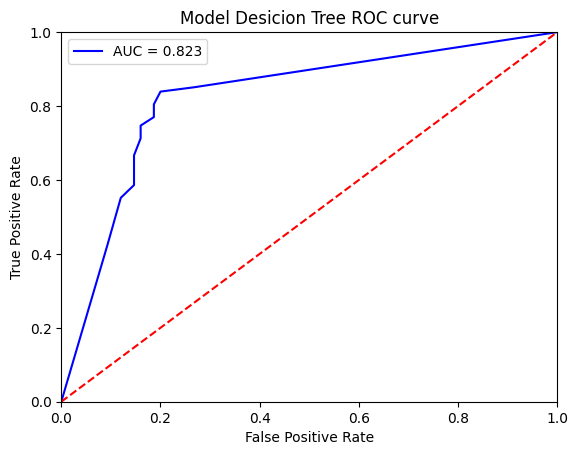

In [ ]:
# Plot ROC curve
plt.title('Model Desicion Tree ROC curve')
plt.plot(fpr_vdt, tpr_vdt, 'b', label = 'AUC = %0.3f' % roc_auc_vdt)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####Feature Selective Random Forest
___

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf_vrf=RandomForestClassifier(n_estimators=20,max_depth=10,random_state=0)
clf_vrf.fit(train_set2,train_y2)

y_pred_test_vrf=clf_vrf.predict(test_set2)
y_pred_train_vrf=clf_vrf.predict(train_set2)

In [ ]:
#find accuracy
ac_te_vrf=accuracy_score(test_y2,y_pred_test_vrf)
ac_tr_vrf=accuracy_score(train_y2,y_pred_train_vrf)
print(ac_te_vrf,ac_tr_vrf)

0.7962962962962963 0.9332298136645962


In [ ]:
test_prob_vrf=clf_vrf.predict_proba(test_set2)
fpr_vrf, tpr_vrf, thresholds_vrf = roc_curve(test_y2,test_prob_vrf[:,1])
roc_auc_vrf = auc(fpr_vrf, tpr_vrf)
roc_auc_vrf

0.8547892720306514

In [ ]:
cm_vrf = confusion_matrix(test_y2,y_pred_test_vrf)
cm_vrf

array([[60, 15],
       [18, 69]])

confusion matrix says 60 predictions are predicted yes and actually yes and  69 prediction are predicted negative and actually negatives.Where as 15 times predicted yes but actually found  no.There are 18 times predicted as no But actually found  yes.

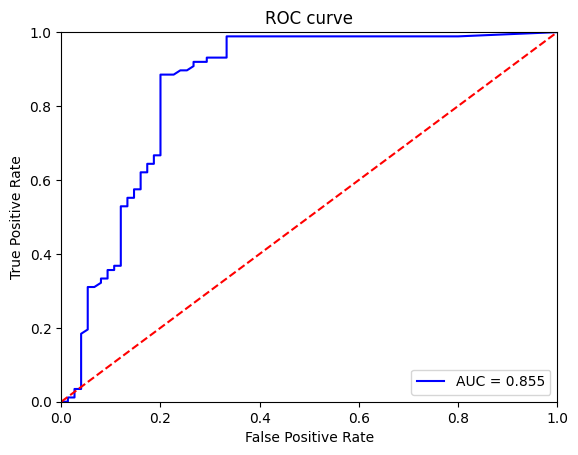

In [ ]:
# Plot ROC curve
plt.title('ROC curve')
plt.plot(fpr_vrf, tpr_vrf, 'b', label = 'AUC = %0.3f' % roc_auc_vrf)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####Feature Selected SVM
___

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
X2_train, X2_test, y2_train,y2_test = train_test_split(X2,y2, test_size=0.2, random_state=1, stratify=y2)

In [ ]:
sc2 = StandardScaler()
sc2.fit(X2_train)
X2_train_std = sc2.transform(X2_train)
X2_test_std = sc2.transform(X2_test)

In [ ]:
# Instantiate the Support Vector Classifier (SVC)
svc2 = SVC(C=1.0, random_state=1, kernel=('rbf'))

# Fit the model
svc2.fit(X2_train_std,y2_train)

SVC(random_state=1)

In [ ]:
# Make the predictions
predict_svmv_y2 = svc2.predict(X2_test_std)
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y2_test,predict_svmv_y2))
print("Recall score %.3f" %metrics.recall_score(y2_test, predict_svmv_y2))
print("Precision score %.3f" %metrics.precision_score(y2_test,predict_svmv_y2))
print("f1 score %.3f"%metrics.f1_score(y2_test,predict_svmv_y2))

Accuracy score 0.790
Recall score 0.963
Precision score 0.716
f1 score 0.821


svm confusion matrix on  selected features

In [ ]:
cm_vsvm=confusion_matrix(y2_test,predict_svmv_y2)
cm_vsvm

array([[50, 31],
       [ 3, 78]])

confusion matrix says 50 predictions are predicted yes and actually yes and 78 prediction are predicted negative and actually negatives.Where as 31 times predicted yes but actually found  no, Eventaully 3 times predicted  no But actually yes

Text(0.5, 0, 'False Positive Rate')

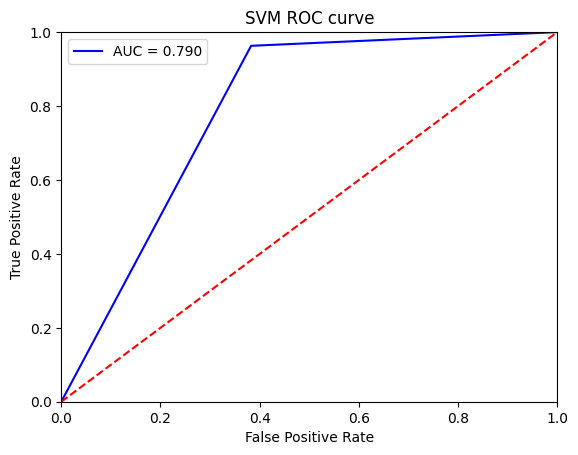

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute fpr, tpr, and thresholds
fpr_v_svc, tpr_v_svc, thresholds = roc_curve(y2_test,predict_svmv_y2)
roc_auc_v_svc = auc(fpr_v_svc, tpr_v_svc)

# Plot ROC curve
plt.title('SVM ROC curve')
plt.plot(fpr_v_svc, tpr_v_svc, 'b', label='AUC = %0.3f' % roc_auc_v_svc)
plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
import xgboost as xgb

# Split data into training and testing sets
X2train, X2test, y2train, y2test = train_test_split(dd.drop('Loan_Status', axis=1), dd['Loan_Status'], test_size=0.2, random_state=42)

# Define XGBoost model and train
clf_vxgb = xgb.XGBClassifier()
clf_vxgb.fit(X2train,y2train)

# Predict on testing set

y2_pred_test_vxgb=clf_vxgb.predict(X2test)
y2_pred_train_vxgb=clf_vxgb.predict(X2train)

#find accuracy
ac_te_vxgb=accuracy_score(y2test,y2_pred_test_vxgb)
ac_tr_vxgb=accuracy_score(y2train,y2_pred_train_vxgb)
print(ac_te_vxgb,ac_tr_vxgb)


0.8148148148148148 0.9767080745341615


In [ ]:
cm_v_xgb= confusion_matrix(y2test,y2_pred_test_vxgb)
cm_v_xgb

array([[63, 18],
       [12, 69]])

confusion matrix says 63 predictions are predicted yes and actually found  yes and 69 prediction are predicted negative and actually found negatives.Where as 18 times predicted yes but actually found no.There are 12 instances were  predicted  no But actually found yes.

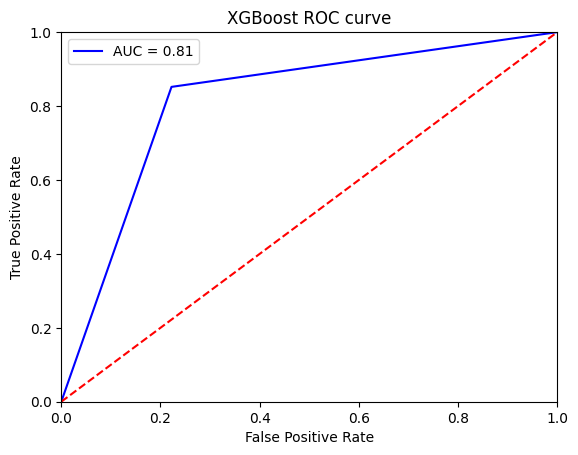

In [ ]:
# Compute fpr, tpr, and thresholds
fpr_vxgb, tpr_vxgb, thresholds = roc_curve(y2test, y2_pred_test_vxgb)
roc_auc_vxgb = auc(fpr_vxgb, tpr_vxgb)

# Plot ROC curve
plt.title('XGBoost ROC curve')
plt.plot(fpr_vxgb, tpr_vxgb, 'b', label='AUC = %0.2f' % roc_auc_vxgb)
plt.legend(loc='best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


###End of all Models

### Base Model Hyperparameter tunning using Optuna

In [ ]:
feature.head()

,Married_1,Education_2,CoapplicantIncome,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_1,Property_Area_2,Property_Area_3,Loan_Status
0,0,1,0,5849,128,360,1,0,1,1
1,1,1,1508,4583,128,360,1,0,0,0
2,1,1,0,3000,66,360,1,0,1,1
3,1,0,2358,2583,120,360,1,0,1,1
4,0,1,0,6000,141,360,1,0,1,1


In [ ]:
#lets extract features and targets
X1=feature.drop(columns=['Loan_Status'],axis=1)
y1=feature['Loan_Status']

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00


### Best model performance

In [ ]:
import optuna
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from statsmodels.formula.api import logit
from sklearn.model_selection import cross_val_score


def objective(trial_model):


    X1 = feature.drop(columns=['Loan_Status'])
    y1 = feature['Loan_Status']

    classifier = trial_model.suggest_categorical('classifier', ['DecisionTree', 'RandomForest', 'XGBoost', 'SVM', 'LogisticRegression'])

    if classifier == 'DecisionTree':
        max_depth = int(trial_model.suggest_float('max_depth', 1, 32, log=True))
        clf = DecisionTreeClassifier(max_depth=max_depth)
    elif classifier == 'RandomForest':
        n_estimators = trial_model.suggest_int('n_estimators', 2, 20)
        max_depth = int(trial_model.suggest_float('max_depth', 1, 32, log=True))
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    elif classifier == 'XGBoost':
        n_estimators = trial_model.suggest_int('n_estimators', 2, 20)
        max_depth = int(trial_model.suggest_float('max_depth', 1, 32, log=True))
        clf = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth)
    elif classifier == 'SVM':
        c = trial_model.suggest_float('svc_c', 1e-10, 1e10, log=True)
        clf = sklearn.svm.SVC(C=c, gamma='auto')
    else:
        c = trial_model.suggest_float('lr_c', 1e-10, 1e10, log=True)
        clf = LogisticRegression(C=c)

    return sklearn.model_selection.cross_val_score(clf, X1, y1, n_jobs=-1, cv=3).mean()


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

best_classifier = trial.params['classifier']
print("Best classifier: {}".format(best_classifier))
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))


[I 2023-04-20 07:00:49,800] A new study created in memory with name: no-name-d6c877ca-c7ae-4c50-a41c-845b1a67748a
[I 2023-04-20 07:00:53,456] Trial 0 finished with value: 0.774288409254841 and parameters: {'classifier': 'XGBoost', 'n_estimators': 9, 'max_depth': 1.6101904090595383}. Best is trial 0 with value: 0.774288409254841.
[I 2023-04-20 07:00:53,835] Trial 1 finished with value: 0.5459135549020696 and parameters: {'classifier': 'SVM', 'svc_c': 750974827.053228}. Best is trial 0 with value: 0.774288409254841.
[I 2023-04-20 07:00:53,949] Trial 2 finished with value: 0.7457045626884167 and parameters: {'classifier': 'LogisticRegression', 'lr_c': 0.004851788296060448}. Best is trial 0 with value: 0.774288409254841.
[I 2023-04-20 07:00:54,035] Trial 3 finished with value: 0.774288409254841 and parameters: {'classifier': 'DecisionTree', 'max_depth': 1.4552665923240924}. Best is trial 0 with value: 0.774288409254841.
[I 2023-04-20 07:00:54,151] Trial 4 finished with value: 0.76683497013

Best classifier: XGBoost
Accuracy: 0.8325750430006105
Best hyperparameters: {'classifier': 'XGBoost', 'n_estimators': 17, 'max_depth': 14.998433071206788}


##Summary of All Models
___

Summary of Base Model

In [ ]:
#Logistic Regression

print("Logistic Regression Model Accuracy score  %.3f" %metrics.accuracy_score(test_y0,y_pred_base_log))
print("Logistic Regression Recall score          %.3f" %metrics.recall_score(test_y0,y_pred_base_log))
print("Logistic Regression Model Precision score %.3f" %metrics.precision_score(test_y0,y_pred_base_log))
print("Logistic Regression Model f1 score        %.3f"%metrics.f1_score(test_y0,y_pred_base_log))

#Desicion Tree

print("Desicion Tree Model Accuracy score        %.3f" %metrics.accuracy_score(test_y0,y_pred_test_bdt))
print("Desicion Tree Model Recall score          %.3f" %metrics.recall_score(test_y0,y_pred_test_bdt))
print("Desicion Tree Model Precision score       %.3f" %metrics.precision_score(test_y0,y_pred_test_bdt))
print("Desicion Tree Model f1 score              %.3f"%metrics.f1_score(test_y0,y_pred_test_bdt))

#Random Forest Model

print("Random Forest Model Accuracy score        %.3f" %metrics.accuracy_score(test_y0,y_pred_test_brf))
print("Random Model Recall score                 %.3f" %metrics.recall_score(test_y0,y_pred_test_brf))
print("Random Model Precision score              %.3f" %metrics.precision_score(test_y0,y_pred_test_brf))
print("Random Model f1 score                     %.3f"%metrics.f1_score(test_y0,y_pred_test_brf))

# SVM Model

print("Svm MOdel Accuracy score                  %.3f" %metrics.accuracy_score(y0_test,predict_svmb_y0))
print("Svm Model Recall score                    %.3f" %metrics.recall_score(y0_test,predict_svmb_y0))
print("Svm Model Precision score                 %.3f" %metrics.precision_score(y0_test,predict_svmb_y0))
print("Svm Model f1 score                        %.3f"%metrics.f1_score(y0_test,predict_svmb_y0))

# XGBoost Model

print("XGBoost Model Accuracy score              %.3f" %metrics.accuracy_score(y0test,y0_pred_test_bxgb))
print("XGBoost Model Recall score                %.3f" %metrics.recall_score(y0test,y0_pred_test_bxgb))
print("XGBoost Model Precision score             %.3f" %metrics.precision_score(y0test, y0_pred_test_bxgb))
print("XGBoost Model f1 score                    %.3f"%metrics.f1_score(y0test,y0_pred_test_bxgb))


Logistic Regression Model Accuracy score  0.784
Logistic Regression Recall score          0.862
Logistic Regression Model Precision score 0.765
Logistic Regression Model f1 score        0.811
Desicion Tree Model Accuracy score        0.784
Desicion Tree Model Recall score          0.793
Desicion Tree Model Precision score       0.802
Desicion Tree Model f1 score              0.798
Random Forest Model Accuracy score        0.864
Random Model Recall score                 0.931
Random Model Precision score              0.835
Random Model f1 score                     0.880
Svm MOdel Accuracy score                  0.821
Svm Model Recall score                    0.914
Svm Model Precision score                 0.771
Svm Model f1 score                        0.836
XGBoost Model Accuracy score              0.858
XGBoost Model Recall score                0.877
XGBoost Model Precision score             0.845
XGBoost Model f1 score                    0.861


Summary of Feature Selected Model

In [ ]:
#Logistic Regression
print("Logistic Regression Model Accuracy score  %.3f" %metrics.accuracy_score(test_y1,y_pred_feature_log))
print("Logistic Regression Recall score          %.3f" %metrics.recall_score(test_y1,y_pred_feature_log))
print("Logistic Regression Model Precision score %.3f" %metrics.precision_score(test_y1,y_pred_feature_log))
print("Logistic Regression Model f1 score        %.3f"%metrics.f1_score(test_y1,y_pred_feature_log))

#Desicion Tree
print("Desicion Tree Model Accuracy score        %.3f" %metrics.accuracy_score(test_y1,y_pred_test_fdt))
print("Desicion Tree Model Recall score          %.3f" %metrics.recall_score(test_y1,y_pred_test_fdt))
print("Desicion Tree Model Precision score       %.3f" %metrics.precision_score(test_y1,y_pred_test_fdt))
print("Desicion Tree Model f1 score              %.3f"%metrics.f1_score(test_y1,y_pred_test_fdt))

#Random Forest Model
print("Random Forest Model Accuracy score        %.3f" %metrics.accuracy_score(test_y1,y_pred_test_frf))
print("Random Model Recall score                 %.3f" %metrics.recall_score(test_y1,y_pred_test_frf))
print("Random Model Precision score              %.3f" %metrics.precision_score(test_y1,y_pred_test_frf))
print("Random Model f1 score                     %.3f"%metrics.f1_score(test_y1,y_pred_test_frf))

# SVM Model
print("Svm MOdel Accuracy score                  %.3f" %metrics.accuracy_score(y1_test, predict_svmf_y1))
print("Svm Model Recall score                    %.3f" %metrics.recall_score(y1_test,predict_svmf_y1 ))
print("Svm Model Precision score                 %.3f" %metrics.precision_score(y1_test,predict_svmf_y1))
print("Svm Model f1 score                        %.3f"%metrics.f1_score(y1_test,predict_svmf_y1))


# XGBoost Model
print("XGBoost Model Accuracy score              %.3f" %metrics.accuracy_score(y1test,y1_pred_test_fxgb))
print("XGBoost Model Recall score                %.3f" %metrics.recall_score(y1test,y1_pred_test_fxgb))
print("XGBoost Model Precision score             %.3f" %metrics.precision_score(y1test,y1_pred_test_fxgb))
print("XGBoost Model f1 score                    %.3f"%metrics.f1_score(y1test,y1_pred_test_fxgb))


Logistic Regression Model Accuracy score  0.790
Logistic Regression Recall score          0.874
Logistic Regression Model Precision score 0.768
Logistic Regression Model f1 score        0.817
Desicion Tree Model Accuracy score        0.765
Desicion Tree Model Recall score          0.759
Desicion Tree Model Precision score       0.795
Desicion Tree Model f1 score              0.776
Random Forest Model Accuracy score        0.840
Random Model Recall score                 0.874
Random Model Precision score              0.835
Random Model f1 score                     0.854
Svm MOdel Accuracy score                  0.802
Svm Model Recall score                    0.914
Svm Model Precision score                 0.747
Svm Model f1 score                        0.822
XGBoost Model Accuracy score              0.846
XGBoost Model Recall score                0.889
XGBoost Model Precision score             0.818
XGBoost Model f1 score                    0.852


In [ ]:
#Logistic Regression
print("Logistic Regression Model Accuracy score  %.3f" %metrics.accuracy_score(test_y2,y_pred_log))
print("Logistic Regression Recall score          %.3f" %metrics.recall_score(test_y2,y_pred_log))
print("Logistic Regression Model Precision score %.3f" %metrics.precision_score(test_y2,y_pred_log))
print("Logistic Regression Model f1 score        %.3f"%metrics.f1_score(test_y2,y_pred_log))

#Desicion Tree
print("Desicion Tree Model Accuracy score        %.3f" %metrics.accuracy_score(test_y2,y_pred_test_vdt))
print("Desicion Tree Model Recall score          %.3f" %metrics.recall_score(test_y2,y_pred_test_vdt))
print("Desicion Tree Model Precision score       %.3f" %metrics.precision_score(test_y2,y_pred_test_vdt))
print("Desicion Tree Model f1 score              %.3f"%metrics.f1_score(test_y2,y_pred_test_vdt))

#Random Forest Model
print("Random Forest Model Accuracy score        %.3f" %metrics.accuracy_score(test_y2,y_pred_test_vrf))
print("Random Model Recall score                 %.3f" %metrics.recall_score(test_y2,y_pred_test_vrf))
print("Random Model Precision score              %.3f" %metrics.precision_score(test_y2,y_pred_test_vrf))
print("Random Model f1 score                     %.3f"%metrics.f1_score(test_y2,y_pred_test_vrf))


# SVM Model
print("Svm MOdel Accuracy score                  %.3f" %metrics.accuracy_score(y2_test, predict_svmv_y2))
print("Svm Model Recall score                    %.3f" %metrics.recall_score(y2_test,predict_svmv_y2 ))
print("Svm Model Precision score                 %.3f" %metrics.precision_score(y2_test,predict_svmv_y2))
print("Svm Model f1 score                        %.3f"%metrics.f1_score(y2_test,predict_svmv_y2))


# XGBoost Model
print("XGBoost Model Accuracy score              %.3f" %metrics.accuracy_score(y2test,y2_pred_test_vxgb))
print("XGBoost Model Recall score                %.3f" %metrics.recall_score(y2test,y2_pred_test_vxgb))
print("XGBoost Model Precision score             %.3f" %metrics.precision_score(y2test,y2_pred_test_vxgb))
print("XGBoost Model f1 score                    %.3f"%metrics.f1_score(y2test,y2_pred_test_vxgb))


Logistic Regression Model Accuracy score  0.827
Logistic Regression Recall score          0.989
Logistic Regression Model Precision score 0.761
Logistic Regression Model f1 score        0.860
Desicion Tree Model Accuracy score        0.790
Desicion Tree Model Recall score          0.770
Desicion Tree Model Precision score       0.827
Desicion Tree Model f1 score              0.798
Random Forest Model Accuracy score        0.796
Random Model Recall score                 0.793
Random Model Precision score              0.821
Random Model f1 score                     0.807
Svm MOdel Accuracy score                  0.790
Svm Model Recall score                    0.963
Svm Model Precision score                 0.716
Svm Model f1 score                        0.821
XGBoost Model Accuracy score              0.815
XGBoost Model Recall score                0.852
XGBoost Model Precision score             0.793
XGBoost Model f1 score                    0.821


In [ ]:
import pandas as pd
# Initialize  data to Dicts of Series.

S={'Accuracy':pd.Series([0.784,0.784,0.864,0.821,0.858,0.790,0.765,0.840,0.802,0.846,0.827,0.790,0.796,0.790,0.815],
                         index=['Base Logistic Regression','Base Decision Tree','Base Random Forest','Base Support vector classifiaction','Base XGBoost','Logistic Regression Ext','Decision Ext Tree','Random Forest Ext','SVM Ext','XGBoost Ext','Logistic Regression','Decision Tree','Random Forest','Support vector Classification','XGBoost vif']),
    'Precision':pd.Series([0.765,0.802,0.835,0.771,0.845,0.768,0.795,0.835,0.747,0.818,0.761,0.827,0.821,0.716,0.793],
                          index=['Base Logistic Regression','Base Decision Tree','Base Random Forest','Base Support vector classifiaction','Base XGBoost','Logistic Regression Ext','Decision Ext Tree','Random Forest Ext','SVM Ext','XGBoost Ext','Logistic Regression','Decision Tree','Random Forest','Support vector Classification','XGBoost vif']),

    'Recall':pd.Series([0.862,0.793,0.931,0.914,0.877,0.874,0.759,0.874,0.914,0.889,0.989,0.77,0.793,0.963,0.852],
                          index=['Base Logistic Regression','Base Decision Tree','Base Random Forest','Base Support vector classifiaction','Base XGBoost','Logistic Regression Ext','Decision Ext Tree','Random Forest Ext','SVM Ext','XGBoost Ext','Logistic Regression','Decision Tree','Random Forest','Support vector Classification','XGBoost vif']),
    'F1 Score':pd.Series([0.811,0.798,0.880,0.836,0.861,0.817,0.776,0.854,0.822,0.852,0.860,0.798,0.807,0.821,0.821],
                          index=['Base Logistic Regression','Base Decision Tree','Base Random Forest','Base Support vector classifiaction','Base XGBoost','Logistic Regression Ext','Decision Ext Tree','Random Forest Ext','SVM Ext','XGBoost Ext','Logistic Regression','Decision Tree','Random Forest','Support vector Classification','XGBoost vif'])}
chart=pd.DataFrame(S)
chart


,Accuracy,Precision,Recall,F1 Score
Base Logistic Regression,0.784,0.765,0.862,0.811
Base Decision Tree,0.784,0.802,0.793,0.798
Base Random Forest,0.864,0.835,0.931,0.880
Base Support vector classifiaction,0.821,0.771,0.914,0.836
Base XGBoost,0.858,0.845,0.877,0.861
Logistic Regression Ext,0.790,0.768,0.874,0.817
Decision Ext Tree,0.765,0.795,0.759,0.776
Random Forest Ext,0.840,0.835,0.874,0.854
SVM Ext,0.802,0.747,0.914,0.822
XGBoost Ext,0.846,0.818,0.889,0.852


In The above table It is clearly vissible that in The Base Model XG Boost having Highest accuracy values .But Base model all the features are present. If we chose feature Selection by Extra Tree Claasifier. The  Accuarcy falls in all model except Logistic regression.If we choose feature using variance inflation factor acccuracy is decreasing surprisingly But Only Logistic Regression Accuracy has imporoved .precision values is comparatively better for XG Boost Extra tree

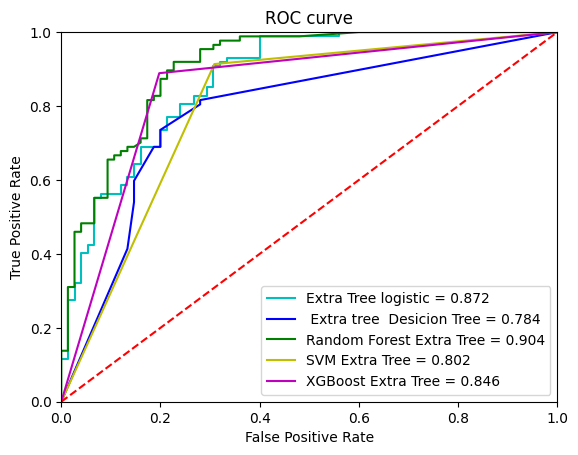

In [ ]:
plt.title('ROC curve')

plt.plot(fpr_Ex_log, tpr_Ex_log, 'c', label = 'Extra Tree logistic = %0.3f' % roc_auc_Ex_log)

plt.plot(fpr_Ex_dt, tpr_Ex_dt, 'b', label = ' Extra tree  Desicion Tree = %0.3f' % roc_auc_Ex_dt)

plt.plot(fpr_frf, tpr_frf, 'g', label = 'Random Forest Extra Tree = %0.3f' % roc_auc_frf)

plt.plot(fpr_E_svc, tpr_E_svc, 'y', label='SVM Extra Tree = %0.3f' % roc_auc_E_svc)

plt.plot(fpr_fxgb, tpr_fxgb, 'm', label='XGBoost Extra Tree = %0.3f' % roc_auc_fxgb)

plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###ROC of All models

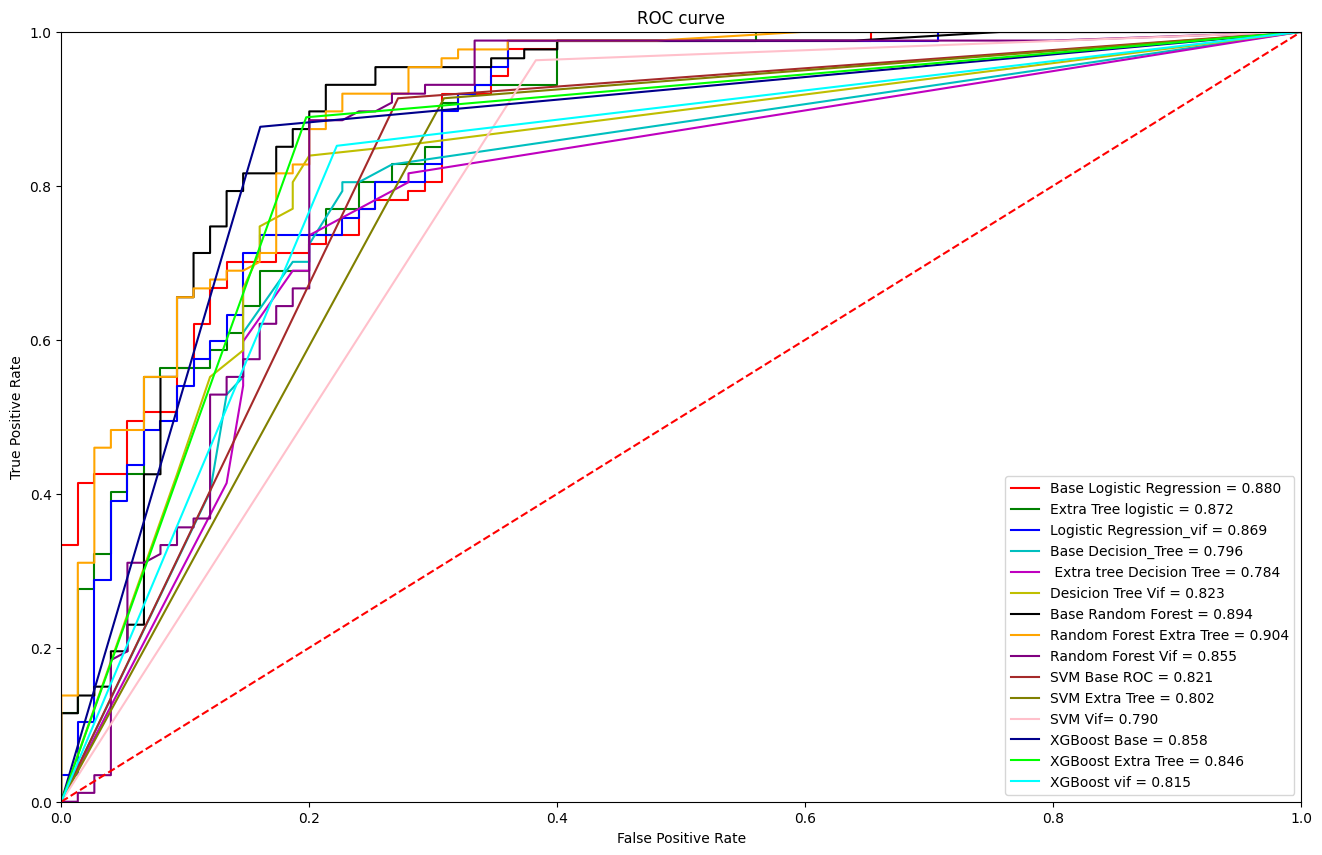

In [ ]:
plt.figure(figsize=(16,10))

plt.plot(fpr_base_log, tpr_base_log, 'r', label = 'Base Logistic Regression = %0.3f' % roc_auc_base_log)

plt.plot(fpr_Ex_log, tpr_Ex_log, 'g', label = 'Extra Tree logistic = %0.3f' % roc_auc_Ex_log)

plt.plot(fpr_log, tpr_log, 'b', label = 'Logistic Regression_vif = %0.3f' % roc_auc_log)

plt.plot(fpr_base_dt, tpr_base_dt, 'c', label = 'Base Decision_Tree = %0.3f' % roc_auc_base_dt)

plt.plot(fpr_Ex_dt, tpr_Ex_dt, 'm', label = ' Extra tree Decision Tree = %0.3f' % roc_auc_Ex_dt)

plt.plot(fpr_vdt, tpr_vdt, 'y', label = 'Desicion Tree Vif = %0.3f' % roc_auc_vdt)

plt.plot(fpr_base_rf, tpr_base_rf, 'k', label = 'Base Random Forest = %0.3f' % roc_auc_base_rf)

plt.plot(fpr_frf, tpr_frf, 'orange', label = 'Random Forest Extra Tree = %0.3f' % roc_auc_frf)

plt.plot(fpr_vrf, tpr_vrf, 'purple', label = 'Random Forest Vif = %0.3f' % roc_auc_vrf)

plt.plot(fpr_base_svc, tpr_base_svc, 'brown', label='SVM Base ROC = %0.3f' % roc_auc_base_svc)

plt.plot(fpr_E_svc, tpr_E_svc, 'olive', label='SVM Extra Tree = %0.3f' % roc_auc_E_svc)

plt.plot(fpr_v_svc, tpr_v_svc, 'pink', label='SVM Vif= %0.3f' % roc_auc_v_svc)

plt.plot(fpr_bxgb, tpr_bxgb, 'darkblue', label='XGBoost Base = %0.3f' % roc_auc_bxgb)

plt.plot(fpr_fxgb, tpr_fxgb, 'lime', label='XGBoost Extra Tree = %0.3f' % roc_auc_fxgb)

plt.plot(fpr_vxgb, tpr_vxgb, 'cyan', label='XGBoost vif = %0.3f' % roc_auc_vxgb)

plt.title('ROC curve')
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Above Table shows the individual model performance.Random Forest and Logistic are having better Accuracy and F1 Score.It is difficult to choose. Because in the Base Model Random Forest better over other model although base SVM  is closer.  In feature selected Extra Tree Random Forest is having better values. Logistic Regression is having better Accuracy values over Random Forest when we are considering vif method of selecting features.   

###Analysis of all models
___

All four model created  Logistic Regregression, Decision Tree , Random Forest, Support vector Classifier.But as per the table the four performance indicator describes that logistic Regression can be used for prediction.This problem in terms of accuracy it is much stable than any other model . Then Random forest can be used but accuracy is satisfactory in both cases whether features  are good enough contribute to the model prediction.Random model is combination of many decision trees. on the Otherhand, Support vector classifier is rejected because of low accuracy and high Recall.If the recall score and precision  scores are at level ,in that case f1 score is consisdered.Selecting model 4 metrics are essential for selecting right model.very high recall or very high precision  values  bothe are not desirable.it is obseved f1 score is the combination of both and also encourages the model performance accuracy.

**Confusion Matrix of all models**

In [ ]:

import pandas as pd

# create a dictionary
d = {'Base Logistic Regression':cm_base_log ,'Base Decision Tree':cm_base_dt,'Base Random Forest':cm_base_rf,'Base Support vector classifiaction':cm_base_svm,'XGBoost base':cm_base_xgb,'Logistic Regression Ext':cm_feature_log,'Decision Tree Ext':cm_feature_dt,'Random Forest Ext':cm_feature_rf,'Svm Ext':cm_Extra_svm,'XGBoost Ext':cm_feature_xgb,'Logistic Regression':cm_log1,'Decision Tree':cm_vdt,'Random Forest':cm_vrf,'Support vector Classification':cm_vsvm,'XGBoost vif':cm_v_xgb}

# create a series
Matrix = pd.Series(d)

print(Matrix)

Base Logistic Regression              [[52, 23], [12, 75]]
Base Decision Tree                    [[58, 17], [18, 69]]
Base Random Forest                     [[59, 16], [6, 81]]
Base Support vector classifiaction     [[59, 22], [7, 74]]
XGBoost base                          [[68, 13], [10, 71]]
Logistic Regression Ext               [[52, 23], [11, 76]]
Decision Tree Ext                     [[58, 17], [21, 66]]
Random Forest Ext                     [[60, 15], [11, 76]]
Svm Ext                                [[56, 25], [7, 74]]
XGBoost Ext                            [[65, 16], [9, 72]]
Logistic Regression                    [[48, 27], [1, 86]]
Decision Tree                         [[61, 14], [20, 67]]
Random Forest                         [[60, 15], [18, 69]]
Support vector Classification          [[50, 31], [3, 78]]
XGBoost vif                           [[63, 18], [12, 69]]
dtype: object


The model performance matrix shows interms of accuracy Logistic Regression and features selection using vif is recommended , But if We refer the confusion Matrix for all models , we will not accept Logistic Rgression . Because the Logistic Regression has low beta error.There is only one case is False negative. The matrix is not balanced .on the otherhand Random Forest using Extra Tree Feature Selection having acceptable balanced confusing matrix with better accuracy than logistic therefore Random Forest is used for Prediction

### Business inference
___

Loan status is a decision from bank prospective.Bank point of view outcome of wrong prediction for false negative and False Positive are the limitation of all models.The predictions are having four posibile outcomes.According to this context false positives are those that, where model predicted the customer are eligible for loan.But Actually they are defaulter.which means, if the loan disbursed to the person will not to pay back.It is those cases are actualy negative,but which are wrong predicted as positive.On the other hand False negative is actually the person is eligible for loan,But model prediction judged incorrectly that the applicant is not eligible. In the second case bank definitely loose some poteintial prospect customers.If the value of False negative is  higher than value of False positive Dream House  is at minimum risk.But if the situation where False positive is much higher than False negative Dream House Finance may face trouble to recover the loan amount.The Dream Housing Finance certainly will not compromise with defaulter.The interest is the profit of the Dream Housing Finance Institute.Organisation  generally dont want to sacrifice principle by lending to customer for cost of anything.      
      According to confusion matrix Random Forest And logistic regression is having more balanced values.The model confusion matrix having not accepting  logistic inspite of having improvement in accuracy on vif feature selection. Extra Tree Random Forest is having  much balanced outcome in confusion matrix

# New Data for prediction
___




### Data Information

In [ ]:
# Loading Data
loan_test=pd.read_csv("/content/drive/MyDrive/loan_prediction_test.csv")
loan_test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [ ]:
# find number of columns and rows
loan_test.shape

(367, 12)

### Tracking Missing Values in Train data

In [ ]:
loan_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
df_test=loan_test[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']].copy()
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


###Train Data Normalisation
___

In [ ]:
df_test.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [ ]:
df_test['Gender'].value_counts(normalize=True,dropna=False)

Male      0.779292
Female    0.190736
NaN       0.029973
Name: Gender, dtype: float64

In [ ]:
df_test['Gender'].value_counts(normalize=True)

Male      0.803371
Female    0.196629
Name: Gender, dtype: float64

In [ ]:
df_test['Gender'] = df_test['Gender'].fillna(pd.Series(np.random.choice(['Male', 'Female'],
                                                      p=[0.80,0.20], size=len(df_test))))

In [ ]:
df_test[df_test['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [ ]:
df_test.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [ ]:
df_test['Self_Employed'].value_counts(normalize=True, dropna=False)

No     0.836512
Yes    0.100817
NaN    0.062670
Name: Self_Employed, dtype: float64

In [ ]:
df_test['Self_Employed'].value_counts(normalize=True)

No     0.892442
Yes    0.107558
Name: Self_Employed, dtype: float64

In [ ]:
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(pd.Series(np.random.choice(['No','Yes'],
                                                      p=[0.89,0.11], size=len(df_test))))

In [ ]:
df_test[df_test["Self_Employed"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [ ]:
df_test.Loan_Amount_Term .value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
df_test["Loan_Amount_Term"].min(),df_test["Loan_Amount_Term"].max(),df_test["Loan_Amount_Term"].mean(),df_test["Loan_Amount_Term"].median(),df_test["Loan_Amount_Term"].mode()

(6.0,
 480.0,
 342.53739612188366,
 360.0,
 0    360.0
 Name: Loan_Amount_Term, dtype: float64)

In [ ]:
df_test["Loan_Amount_Term"]=df_test["Loan_Amount_Term"].fillna(df_test["Loan_Amount_Term"].mode())

In [ ]:
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(360.0)

In [ ]:
df_test[df_test["Loan_Amount_Term"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [ ]:
df_test.LoanAmount.value_counts()

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
71.0      1
157.0     1
93.0      1
61.0      1
98.0      1
Name: LoanAmount, Length: 144, dtype: int64

In [ ]:
df_test["LoanAmount"].min(),df_test["LoanAmount"].max(),df_test["LoanAmount"].mean(),df_test["LoanAmount"].median(),df_test["LoanAmount"].mode()

(28.0,
 550.0,
 136.13259668508286,
 125.0,
 0    150.0
 Name: LoanAmount, dtype: float64)

In [ ]:
df_test["LoanAmount"]=df_test["LoanAmount"].fillna(df_test["LoanAmount"].median())

In [ ]:
df_test[df_test["LoanAmount"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [ ]:
df_test.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [ ]:
df_test['Credit_History'].min(),df_test['Credit_History'].max(),df_test['Credit_History'].mean(),df_test['Credit_History'].median(),df_test['Credit_History'].mode()

(0.0,
 1.0,
 0.8254437869822485,
 1.0,
 0    1.0
 Name: Credit_History, dtype: float64)

In [ ]:
df_test["Credit_History"]=df_test["Credit_History"].fillna(df_test["Credit_History"].mode())

In [ ]:
df_test['Credit_History'] = df_test['Credit_History'].fillna(1.0)

In [ ]:
df_test[df_test["Credit_History"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [ ]:
df_test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [ ]:
df_test['Dependents'].value_counts(normalize=True, dropna=False)

0      0.544959
2      0.160763
1      0.158038
3+     0.108992
NaN    0.027248
Name: Dependents, dtype: float64

In [ ]:
df_test['Dependents'].value_counts(normalize=True)

0     0.560224
2     0.165266
1     0.162465
3+    0.112045
Name: Dependents, dtype: float64

In [ ]:
df_test['Dependents'] = df_test['Dependents'].fillna(pd.Series(np.random.choice(['0.0','1.0','2.0','3+'],
                                                      p=[0.56,0.17,0.16,0.11], size=len(df_test))))

In [ ]:
df_test[df_test["Dependents"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [ ]:
df_k=df_test
df_k.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df_k["Property_Area"].replace({"Urban":3, "Semiurban":2, "Rural":1},inplace=True)
df_k["Married"].replace({"Yes":1,"No":0},inplace=True)
df_k["Gender"].replace({"Male":1,"Female":0},inplace=True)
df_k["Education"].replace({"Graduate":2,"Not Graduate":1},inplace=True)
df_k["Self_Employed"].replace({"Yes":1, "No":0},inplace=True)
df_k["Dependents"].replace({"3+":3},inplace=True)
df_k.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,2,0,5720,0,110.0,360.0,1.0,3
1,LP001022,1,1,1,2,0,3076,1500,126.0,360.0,1.0,3
2,LP001031,1,1,2,2,0,5000,1800,208.0,360.0,1.0,3
3,LP001035,1,1,2,2,0,2340,2546,100.0,360.0,1.0,3
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,3


In [ ]:
df_k["Dependents"]=df_k["Dependents"].astype(float)
df_k.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents           float64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

Making Prediction on Test Data where y is not Present X are the features are available on Data sheet for predict. Logistic Regression Applied to predict the model

### New Data Frame for Prediction
___

In [ ]:
df_a=df_k.drop(['Loan_ID'], axis=1)
df_a.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0.0,2,0,5720,0,110.0,360.0,1.0,3
1,1,1,1.0,2,0,3076,1500,126.0,360.0,1.0,3


In [ ]:
df_a.shape

(367, 11)

In [ ]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    float64
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 31.7 KB


In [ ]:
df_a["Loan_Amount_Term"]=df_a["Loan_Amount_Term"].astype(int)
df_a["Credit_History"]=df_a["Credit_History"].astype(int)
df_a["ApplicantIncome"]=df_a["ApplicantIncome"].astype(int)
df_a["CoapplicantIncome"]=df_a["CoapplicantIncome"].astype(int)
df_a["LoanAmount"]=df_a["LoanAmount"].astype(int)
df_a["Dependents"]=df_a["Dependents"].astype(int)
df_a["Property_Area"]=df_a["Property_Area"].astype(int)
#df7["Credit_History"]=df7["Credit_History"].astype(int)

In [ ]:
df_b=df_a
df_b.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,2,0,5720,0,110,360,1,3
1,1,1,1,2,0,3076,1500,126,360,1,3
2,1,1,2,2,0,5000,1800,208,360,1,3
3,1,1,2,2,0,2340,2546,100,360,1,3
4,1,0,0,1,0,3276,0,78,360,1,3


In [ ]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             367 non-null    int64
 1   Married            367 non-null    int64
 2   Dependents         367 non-null    int64
 3   Education          367 non-null    int64
 4   Self_Employed      367 non-null    int64
 5   ApplicantIncome    367 non-null    int64
 6   CoapplicantIncome  367 non-null    int64
 7   LoanAmount         367 non-null    int64
 8   Loan_Amount_Term   367 non-null    int64
 9   Credit_History     367 non-null    int64
 10  Property_Area      367 non-null    int64
dtypes: int64(11)
memory usage: 31.7 KB


In [ ]:
df_c=df_b.drop(['Gender', 'Dependents','Self_Employed'], axis=1)
df_c.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,2,5720,0,110,360,1,3
1,1,2,3076,1500,126,360,1,3
2,1,2,5000,1800,208,360,1,3
3,1,2,2340,2546,100,360,1,3
4,0,1,3276,0,78,360,1,3


In [ ]:
# change the categorical variables into dummy
df_B=pd.get_dummies(df_c,columns=['Married','Education','Credit_History','Property_Area'],drop_first=True)
df_B.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Married_1,Education_2,Credit_History_1,Property_Area_2,Property_Area_3
0,5720,0,110,360,1,1,1,0,1
1,3076,1500,126,360,1,1,1,0,1
2,5000,1800,208,360,1,1,1,0,1
3,2340,2546,100,360,1,1,1,0,1
4,3276,0,78,360,0,0,1,0,1


In [ ]:
df_trial=df_B[['Married_1','Education_2','CoapplicantIncome','ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History_1','Property_Area_2','Property_Area_3']].copy()
df_trial.head()

,Married_1,Education_2,CoapplicantIncome,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_1,Property_Area_2,Property_Area_3
0,1,1,0,5720,110,360,1,0,1
1,1,1,1500,3076,126,360,1,0,1
2,1,1,1800,5000,208,360,1,0,1
3,1,1,2546,2340,100,360,1,0,1
4,0,0,0,3276,78,360,1,0,1


In [ ]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Married_1          367 non-null    uint8
 1   Education_2        367 non-null    uint8
 2   CoapplicantIncome  367 non-null    int64
 3   ApplicantIncome    367 non-null    int64
 4   LoanAmount         367 non-null    int64
 5   Loan_Amount_Term   367 non-null    int64
 6   Credit_History_1   367 non-null    uint8
 7   Property_Area_2    367 non-null    uint8
 8   Property_Area_3    367 non-null    uint8
dtypes: int64(4), uint8(5)
memory usage: 13.4 KB


In [ ]:
y_pred_new_frf=clf_frf.predict(df_trial)
y_pred_new_frf

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
df_w=pd.DataFrame(y_pred_new_frf,columns=['New_Loan_Status'])
df_w.head(5)

,New_Loan_Status
0,1
1,1
2,1
3,1
4,1


In [ ]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   New_Loan_Status  367 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


In [ ]:
df_w.New_Loan_Status.value_counts()

1    277
0     90
Name: New_Loan_Status, dtype: int64

###Added new column as Loan Status in existing Data Set
___

####New prediction*

In [ ]:
df_k.join(df_w)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,New_Loan_Status
0,LP001015,1,1,0.0,2,0,5720,0,110.0,360.0,1.0,3,1
1,LP001022,1,1,1.0,2,0,3076,1500,126.0,360.0,1.0,3,1
2,LP001031,1,1,2.0,2,0,5000,1800,208.0,360.0,1.0,3,1
3,LP001035,1,1,2.0,2,0,2340,2546,100.0,360.0,1.0,3,1
4,LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3.0,1,1,4009,1777,113.0,360.0,1.0,3,1
363,LP002975,1,1,0.0,2,0,4158,709,115.0,360.0,1.0,3,1
364,LP002980,1,0,0.0,2,0,3250,1993,126.0,360.0,1.0,2,1
365,LP002986,1,1,0.0,2,0,5000,2393,158.0,360.0,1.0,1,0


###**Loan Prediction on given Test Data set**

New Loan Status is our Prediction . Loan Status is our Target on Train Data Sets.

In [ ]:
loan_test.join(df_w)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,New_Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,1
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,1
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,1
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0
